# Midterm Visualizations

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('finalized_county.csv', parse_dates=['date'])
df.sort_values(['county', 'date'], inplace=True)
df['entity'] = df['state'] + '-' + df['county']
df

Unnamed: 0       date   county   state   cases  deaths  \
1350         194 2020-03-10    Clark  Nevada       2     0.0   
1351         206 2020-03-11    Clark  Nevada       5     0.0   
1352         218 2020-03-12    Clark  Nevada       8     0.0   
1353         230 2020-03-13    Clark  Nevada      16     0.0   
1354         242 2020-03-14    Clark  Nevada      16     0.0   
...          ...        ...      ...     ...     ...     ...   
3235        3380 2020-11-30  Tarrant   Texas  100650  1026.0   
3236        3392 2020-12-01  Tarrant   Texas  102051  1043.0   
3237        3404 2020-12-02  Tarrant   Texas  103781  1054.0   
3238        3416 2020-12-03  Tarrant   Texas  105675  1067.0   
3239        3428 2020-12-04  Tarrant   Texas  107178  1077.0   

     stay_at_home_announced stay_at_home_effective        lat         lon  \
1350                     no                     no  36.215243 -115.013549   
1351                     no                     no  36.215243 -115.013549   
1352                     no                     no  36.215243 -115.013549   
1353                     no                     no  36.215243 -115.013549   
1354                     no                     no  36.215243 -115.013549   
...                     ...                    ...        ...         ...   
3235                    yes                    yes  32.771568  -97.291235   
3236                    yes                    yes  32.771568  -97.291235   
3237                    yes                    yes  32.771568  -97.291235   
3238                    yes                    yes  32.771568  -97.291235   
3239                    yes                    yes  32.771568  -97.291235   

      ...  min_temp_10d_avg  min_temp_15d_avg  dewpoint_3d_avg  \
1350  ...             51.48         49.813333        40.366667   
1351  ...             51.84         49.873333        47.966667   
1352  ...             51.79         49.753333        50.833333   
1353  ...             51.16         49.753333        48.166667   
1354  ...             50.59         50.040000        46.266667   
...   ...               ...               ...              ...   
3235  ...               NaN               NaN        29.666667   
3236  ...               NaN               NaN        26.733333   
3237  ...               NaN               NaN        30.100000   
3238  ...               NaN               NaN        33.633333   
3239  ...               NaN               NaN              NaN   

      dewpoint_5d_avg  dewpoint_10d_avg  dewpoint_15d_avg  \
1350            40.14             40.23         37.640000   
1351            44.20             41.44         38.600000   
1352            47.78             41.90         38.813333   
1353            48.18             42.34         39.486667   
1354            46.16             43.13         39.960000   
...               ...               ...               ...   
3235            33.34               NaN               NaN   
3236            31.50               NaN               NaN   
3237            29.12               NaN               NaN   
3238              NaN               NaN               NaN   
3239              NaN               NaN               NaN   

      date_stay_at_home_announced  date_stay_at_home_effective         entity  \
1350                   2020-04-01                   2020-04-01   Nevada-Clark   
1351                   2020-04-01                   2020-04-01   Nevada-Clark   
1352                   2020-04-01                   2020-04-01   Nevada-Clark   
1353                   2020-04-01                   2020-04-01   Nevada-Clark   
1354                   2020-04-01                   2020-04-01   Nevada-Clark   
...                           ...                          ...            ...   
3235                   2020-03-31                   2020-04-02  Texas-Tarrant   
3236                   2020-03-31                   2020-04-02  Texas-Tarrant   
3237                   2020-03-31                   2020-

In [3]:
value_counts = df['county'].value_counts()
value_counts

county
Clark            270
Cook             270
Harris           270
Los Angeles      270
Miami-Dade       270
Nassau           270
New York City    270
Orange           270
Philadelphia     270
San Diego        270
Suffolk          270
Tarrant          270
Name: count, dtype: int64

# 1. Temporal Visualizations
## Plots: Incremental cases over time

### 1.1 Univariate models

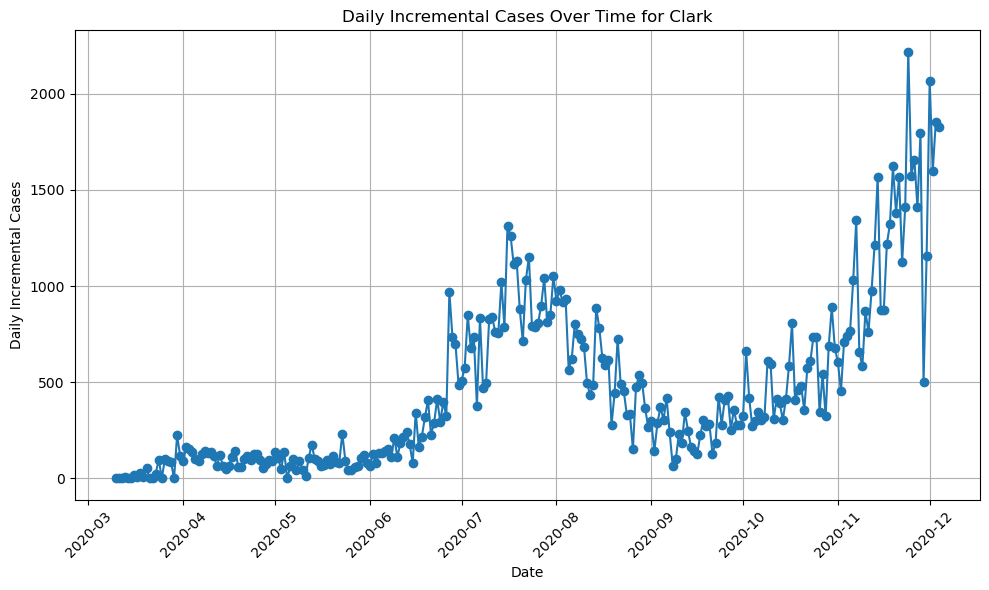

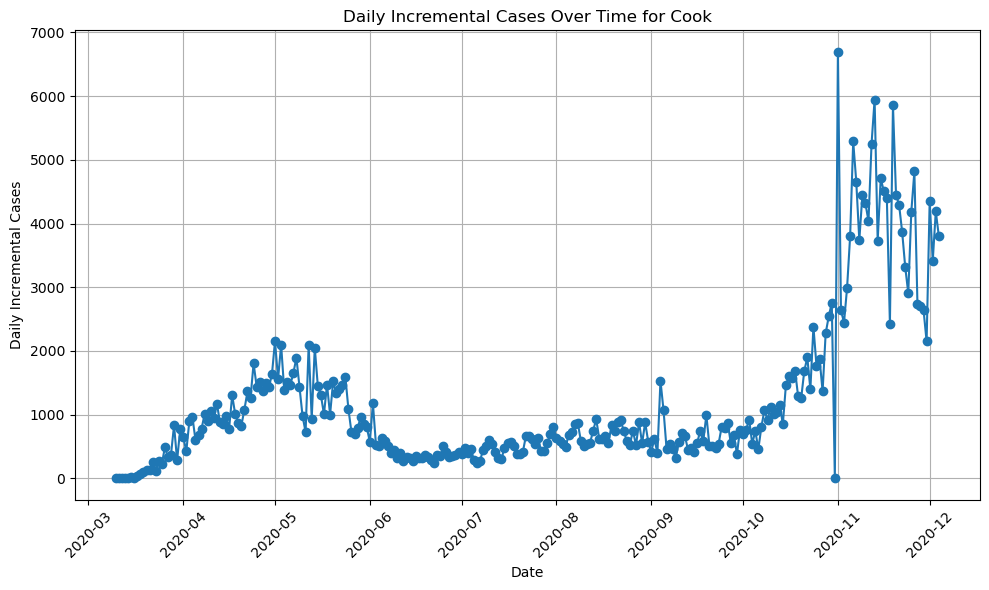

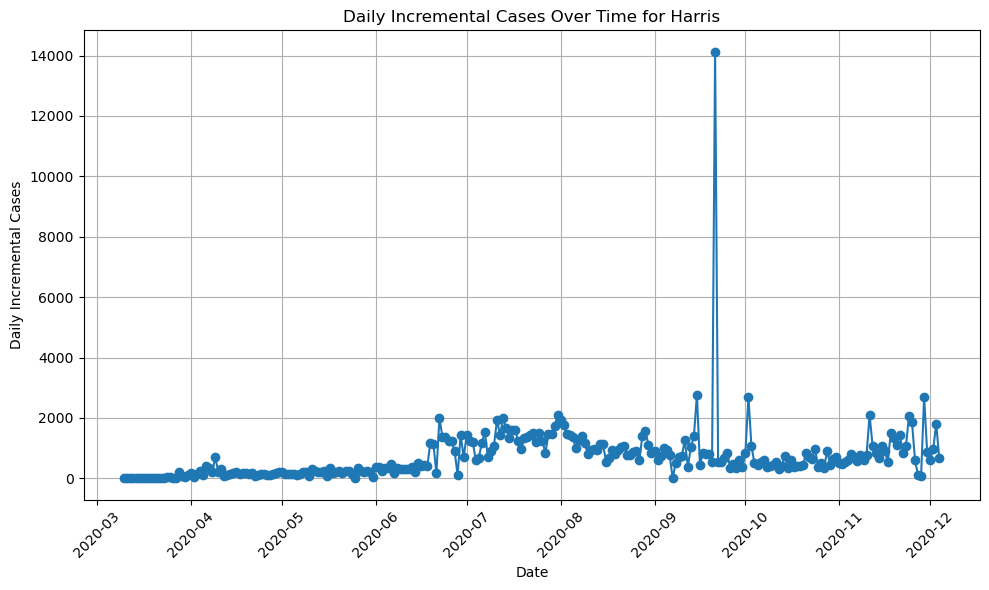

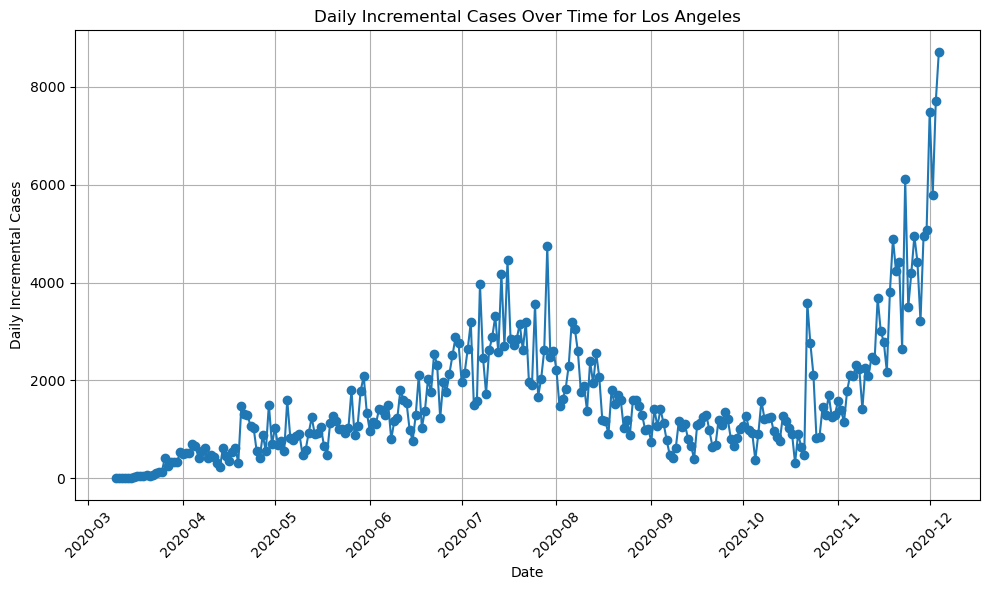

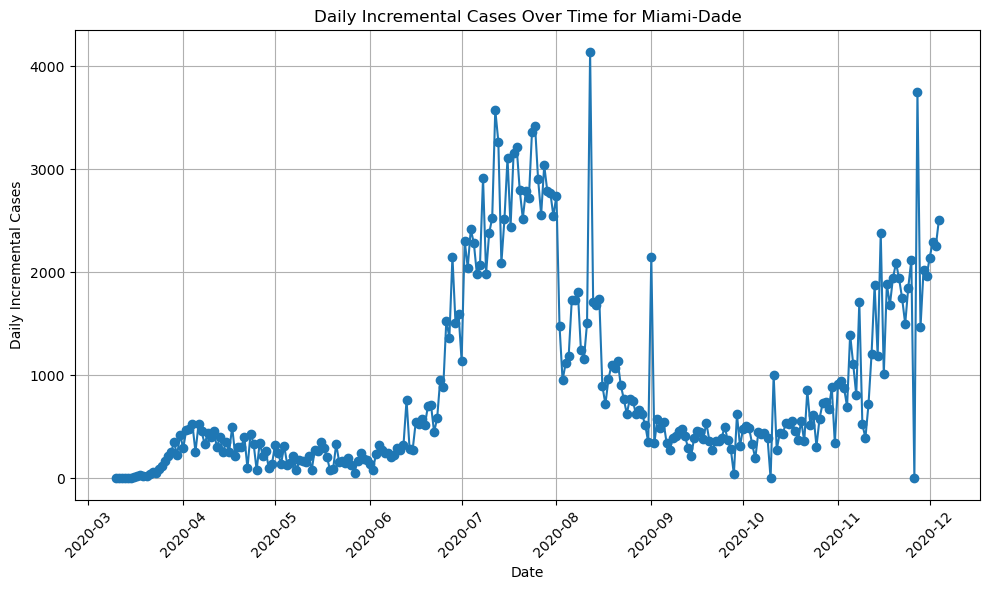

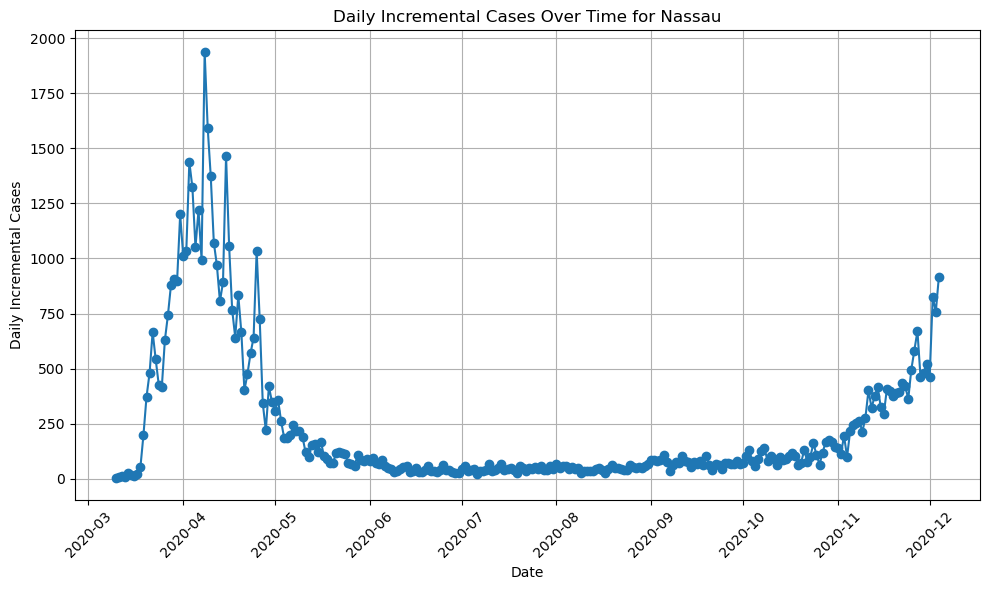

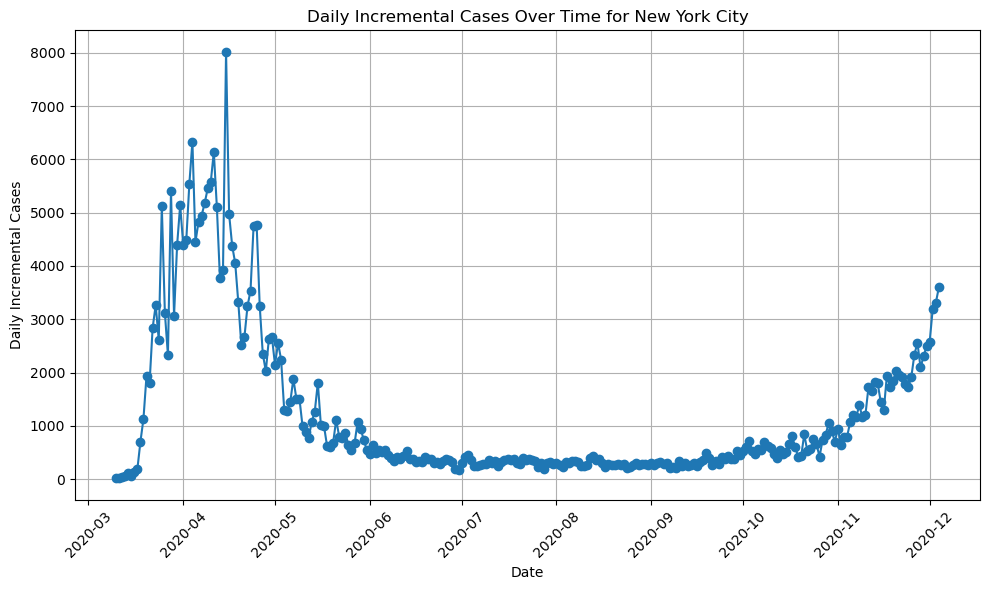

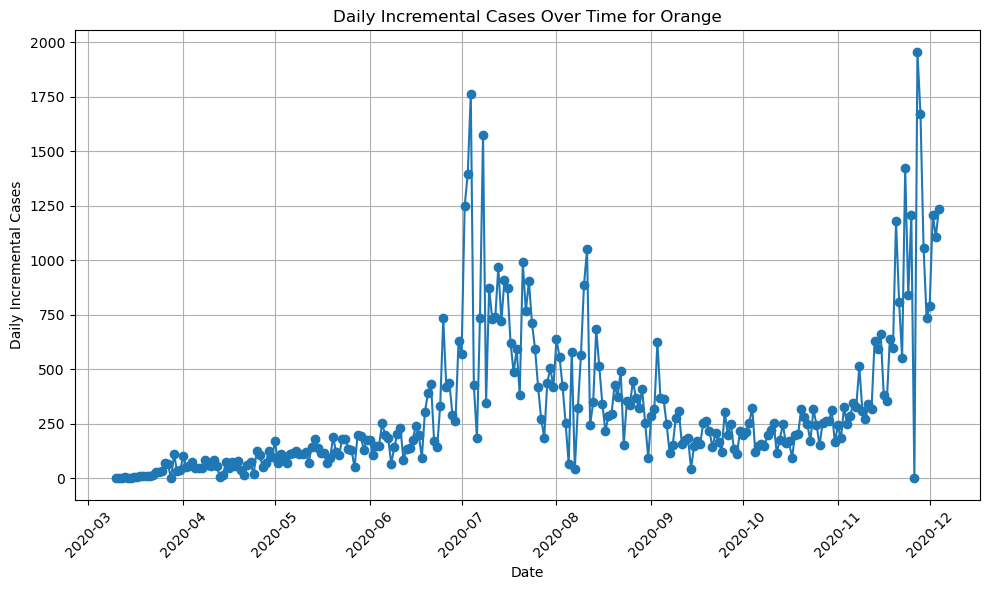

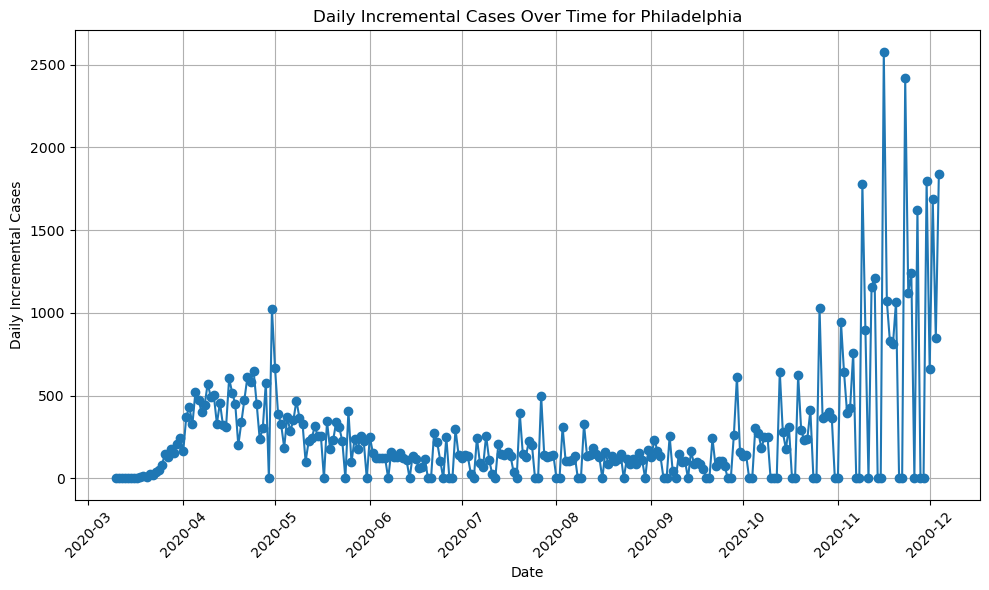

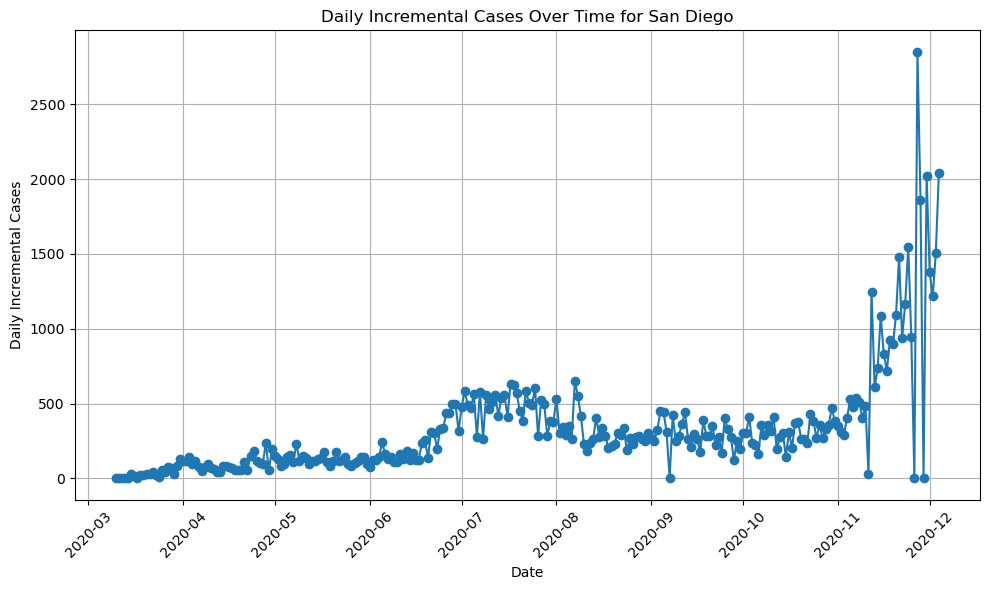

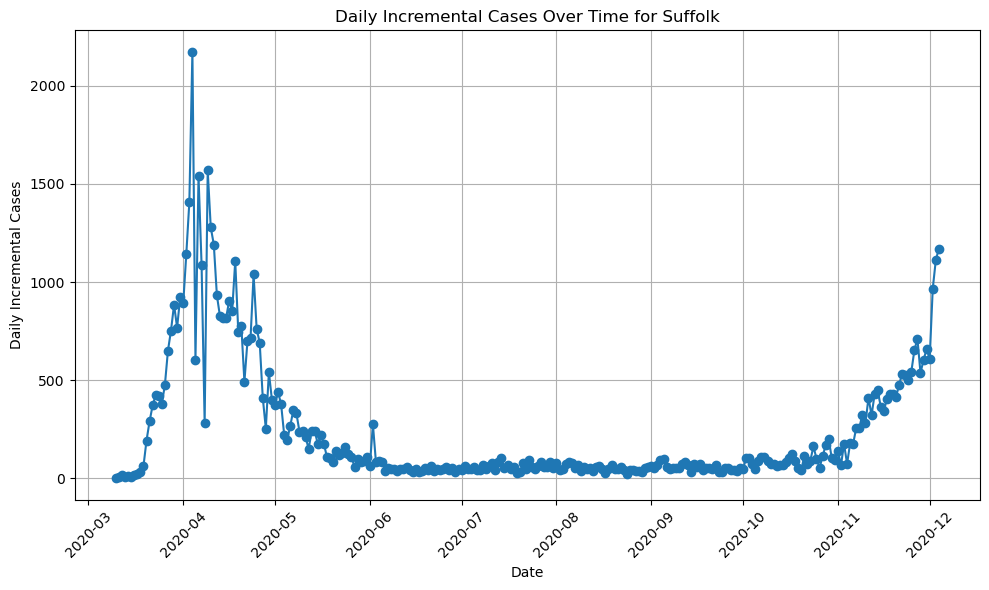

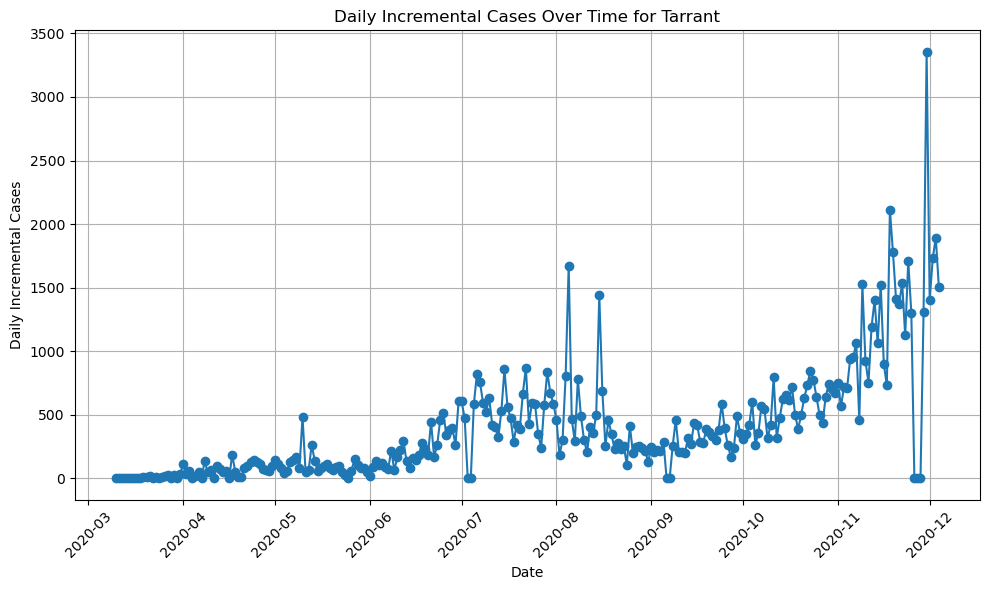

In [86]:
counties = df['county'].unique()

# Separate plots for each county
for county in counties:
    # Filter data for the current county
    county_df = df[df['county'] == county]
    
    # Plotting for this county
    plt.figure(figsize=(10, 6))
    plt.plot(county_df['date'], county_df['incremental_cases'], marker='o', linestyle='-', label=county)
    plt.title(f'Daily Incremental Cases Over Time for {county}')
    plt.xlabel('Date')
    plt.ylabel('Daily Incremental Cases')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

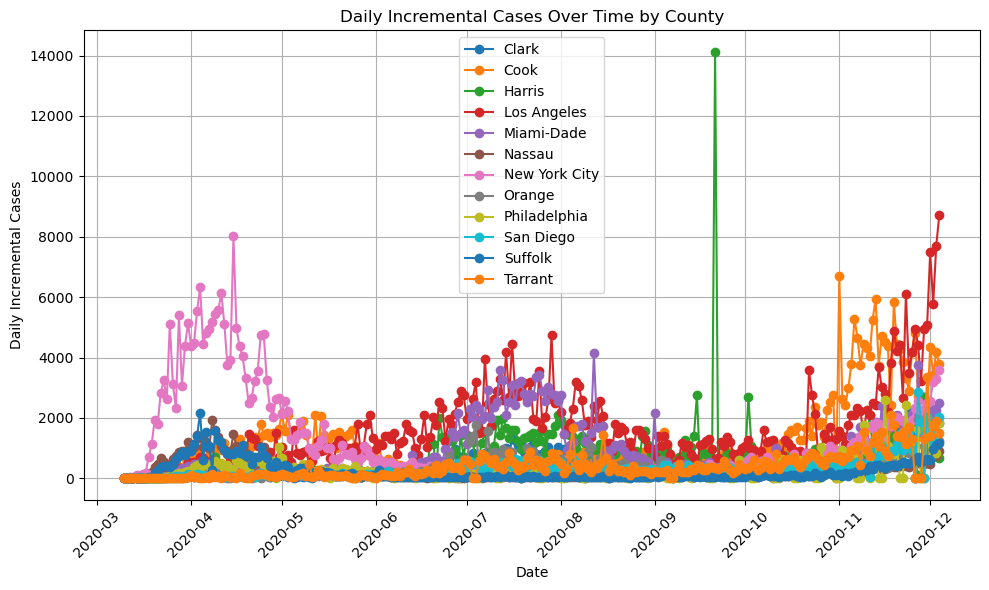

In [88]:
plt.figure(figsize=(10, 6))

for county in counties:
    county_df = df[df['county'] == county]
    plt.plot(county_df['date'], county_df['incremental_cases'], marker='o', linestyle='-', label=county)

plt.title('Daily Incremental Cases Over Time by County')
plt.xlabel('Date')
plt.ylabel('Daily Incremental Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.1 Multivariate models

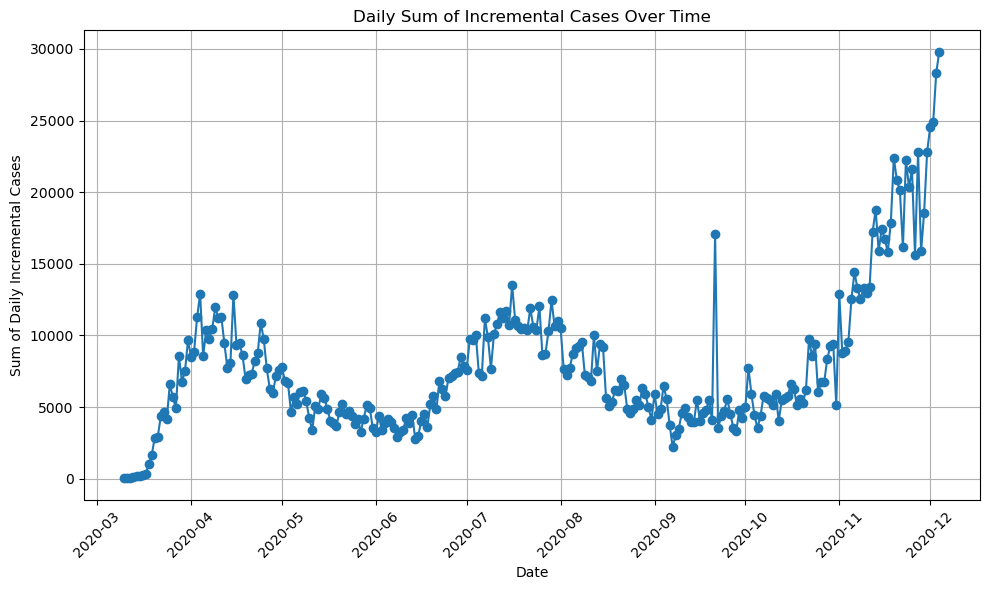

In [6]:
# Group the data by 'date' and sum 'incremental_cases' for each day
daily_cases_sum = df.groupby('date')['incremental_cases'].sum().reset_index()

# Now plot the aggregated data
plt.figure(figsize=(10, 6))
plt.plot(daily_cases_sum['date'], daily_cases_sum['incremental_cases'], marker='o', linestyle='-')

plt.title('Daily Sum of Incremental Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Sum of Daily Incremental Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Seasonal Decomposition
## Plots: Incremental cases over time

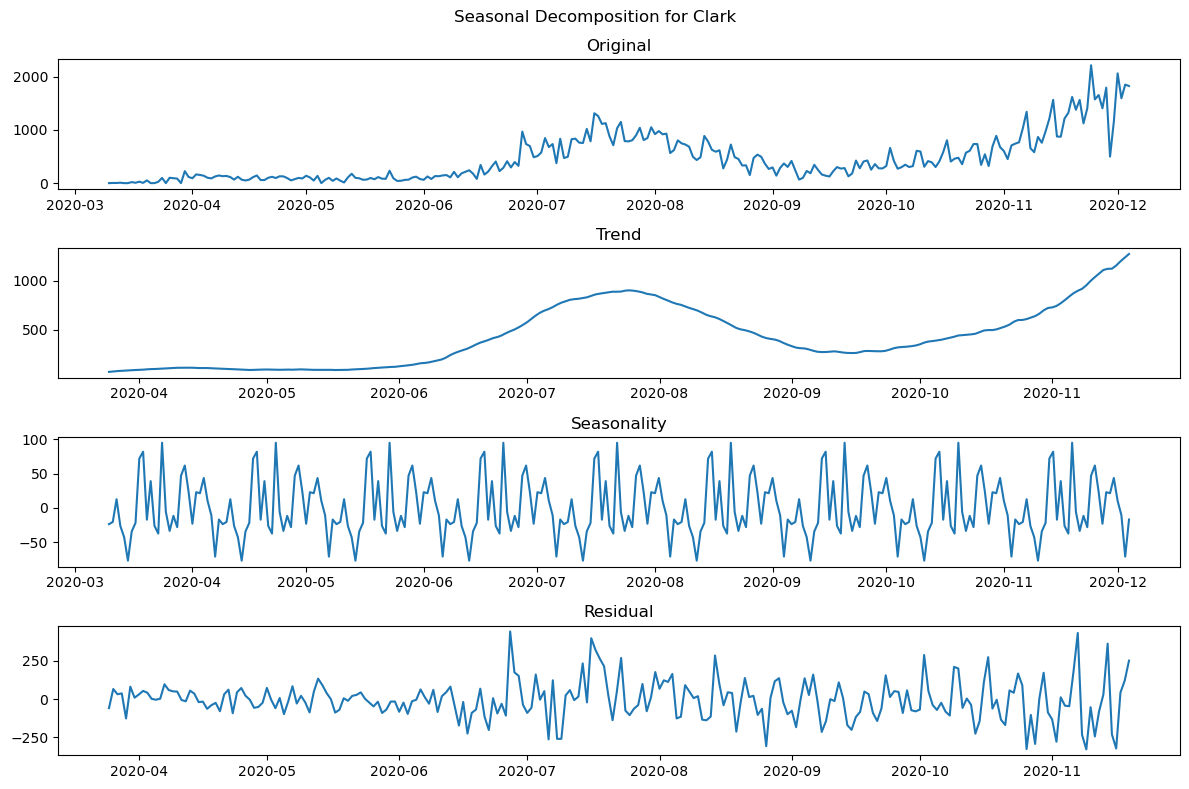

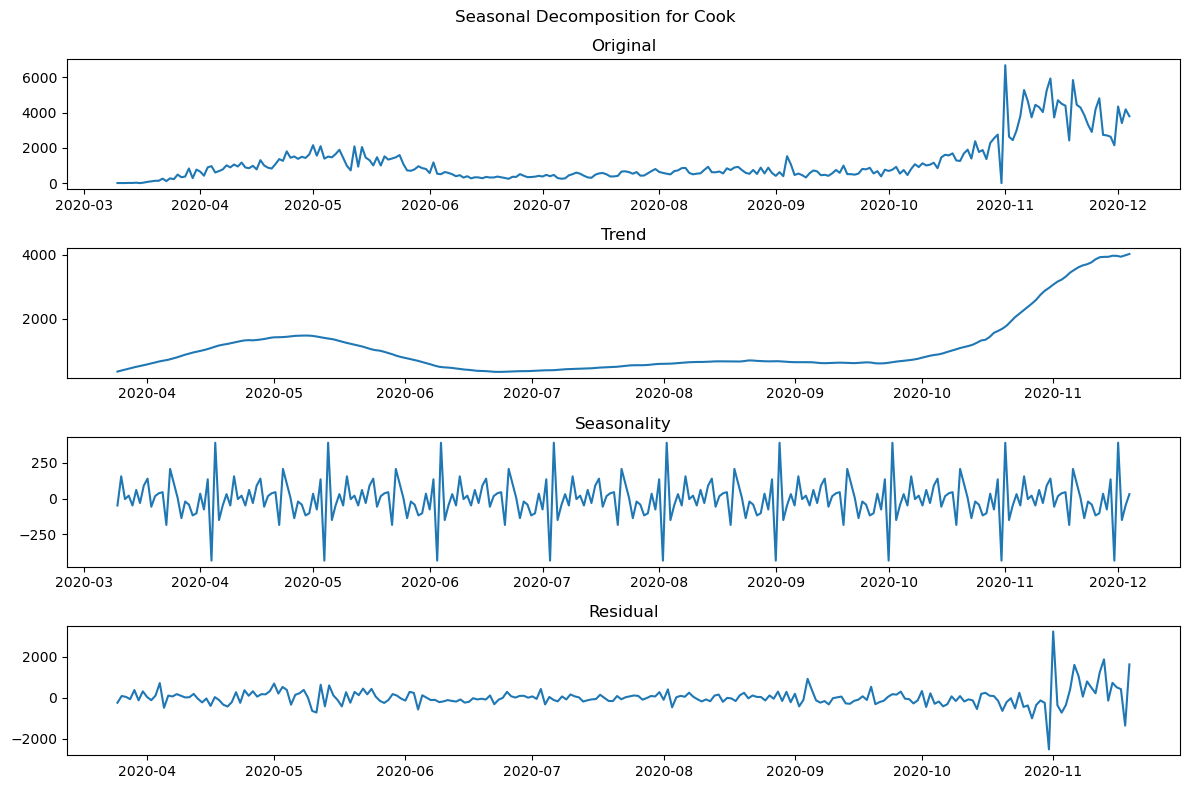

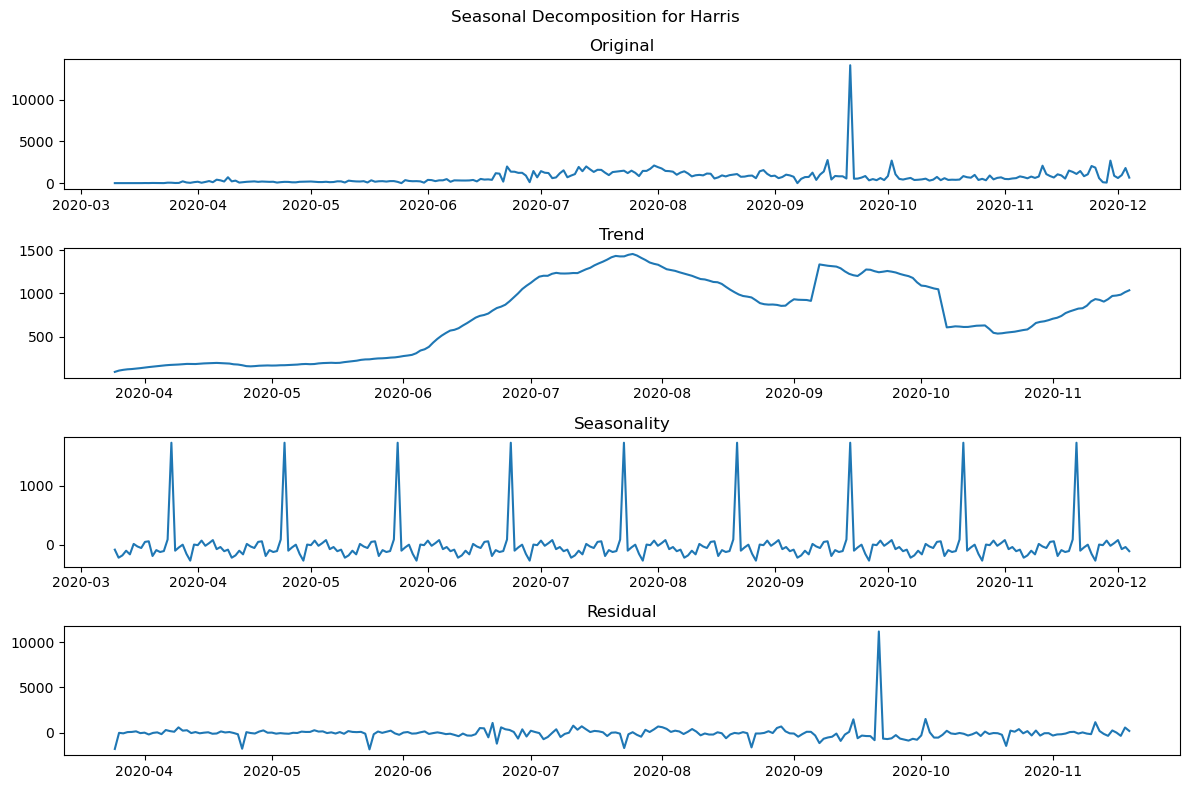

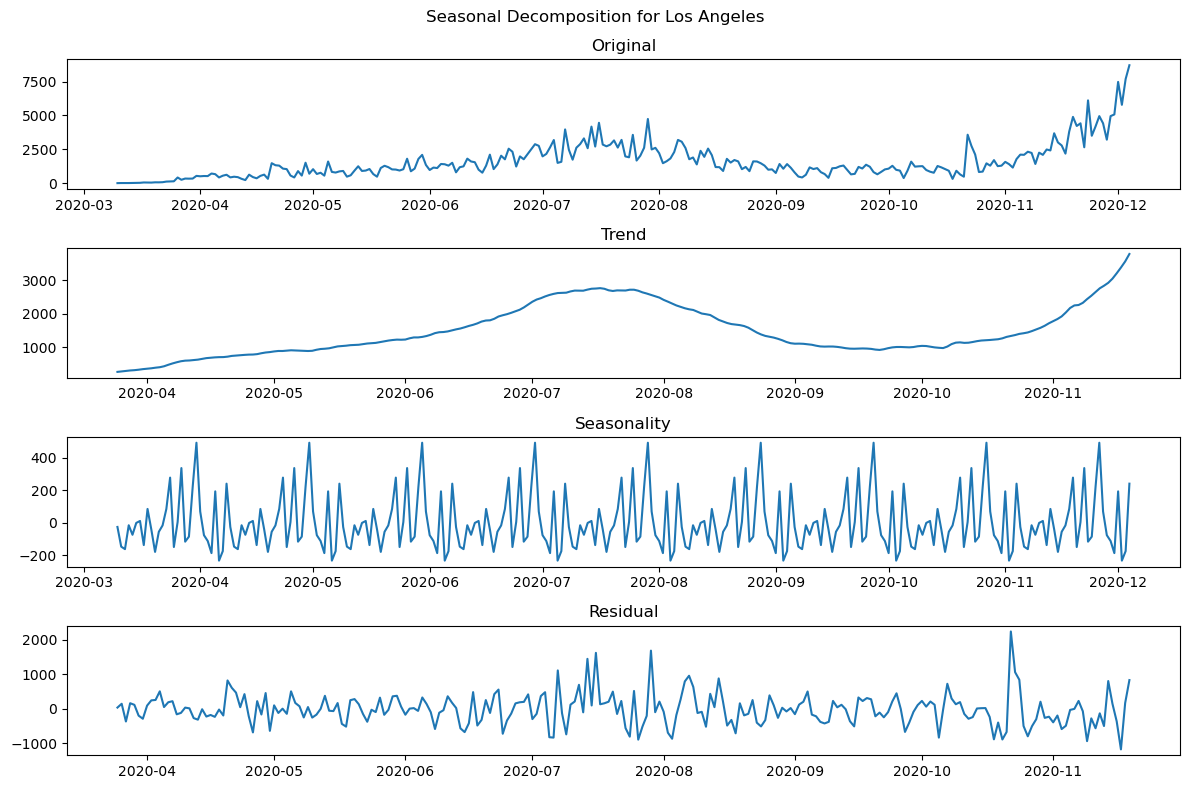

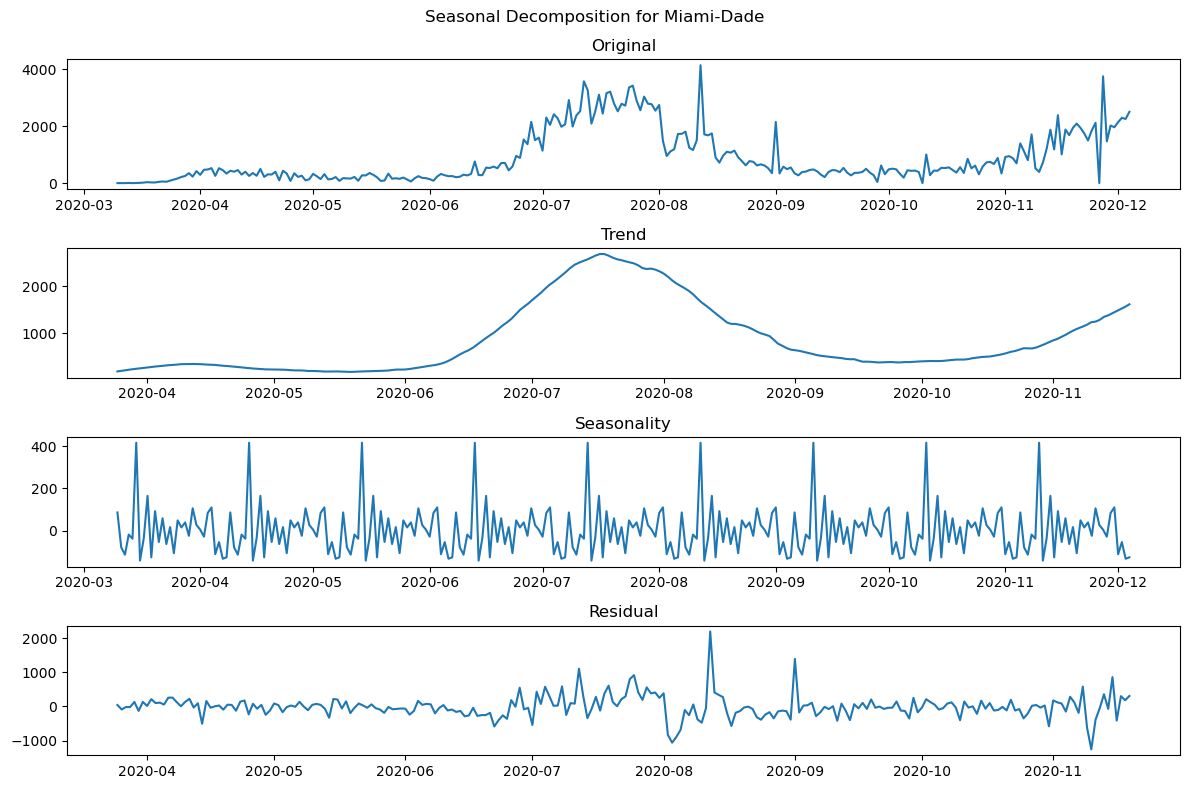

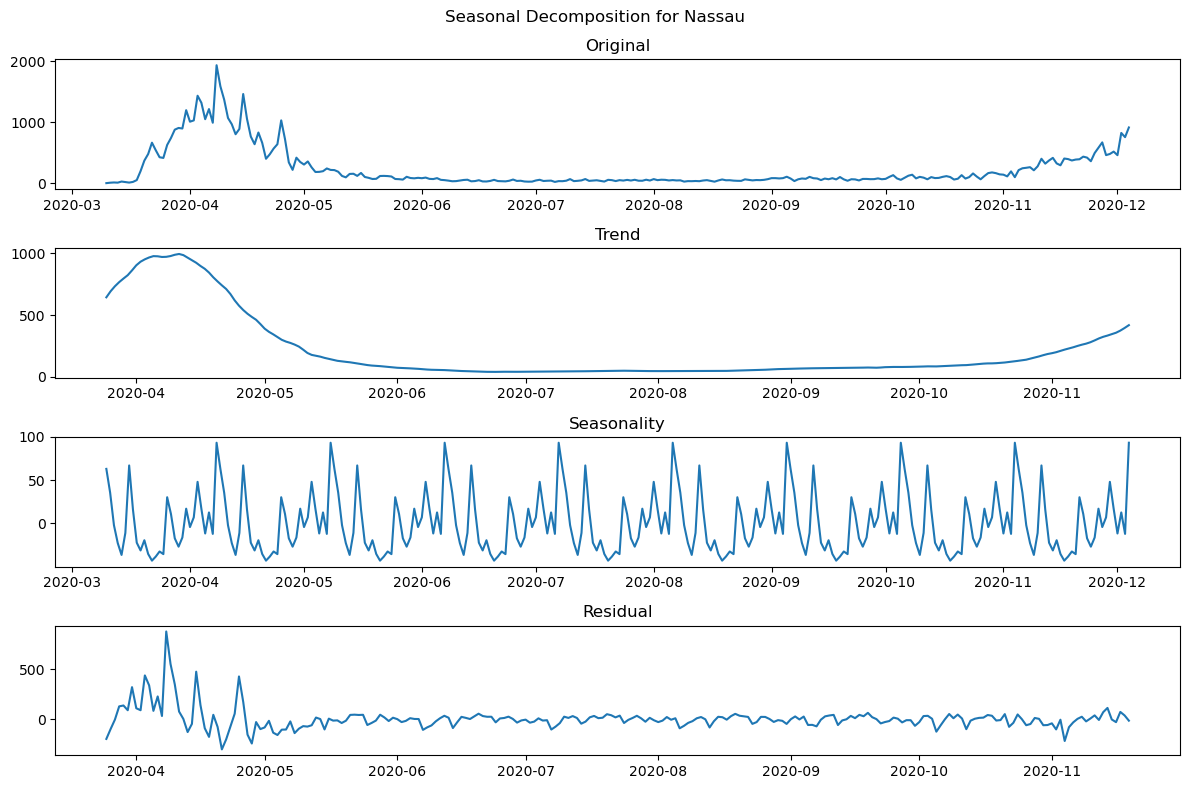

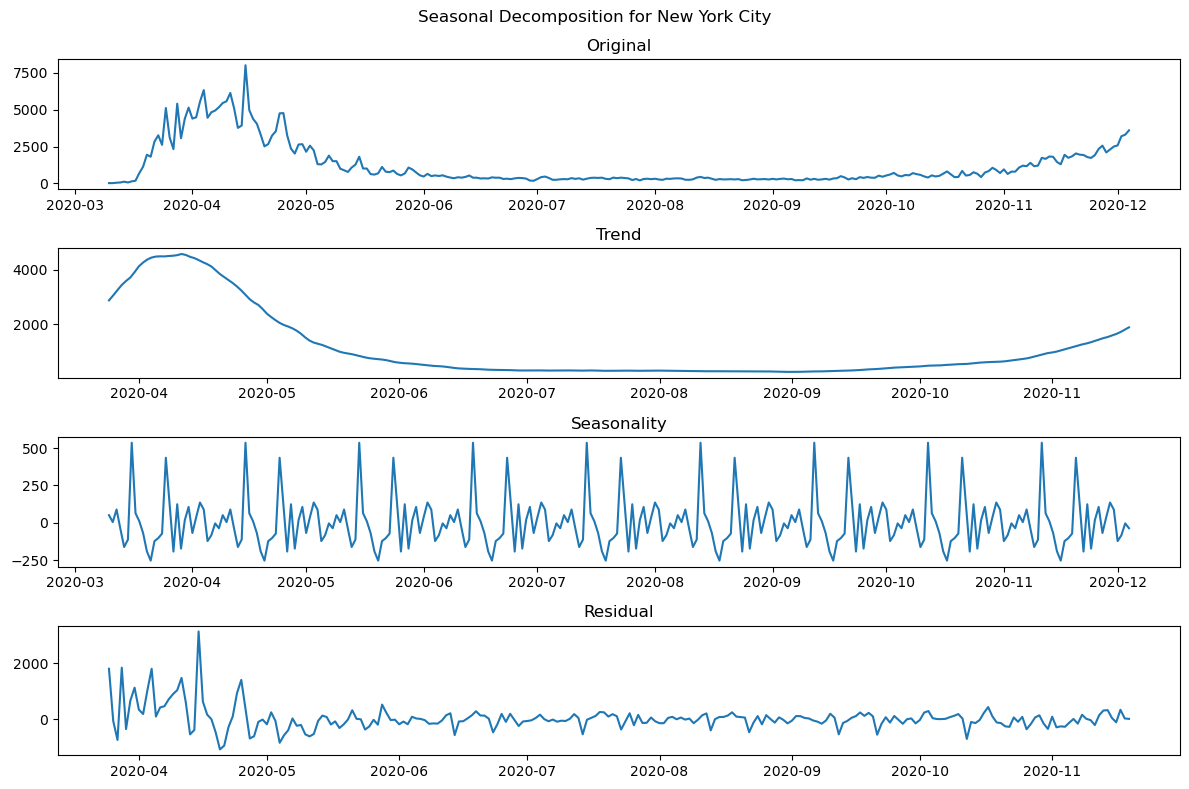

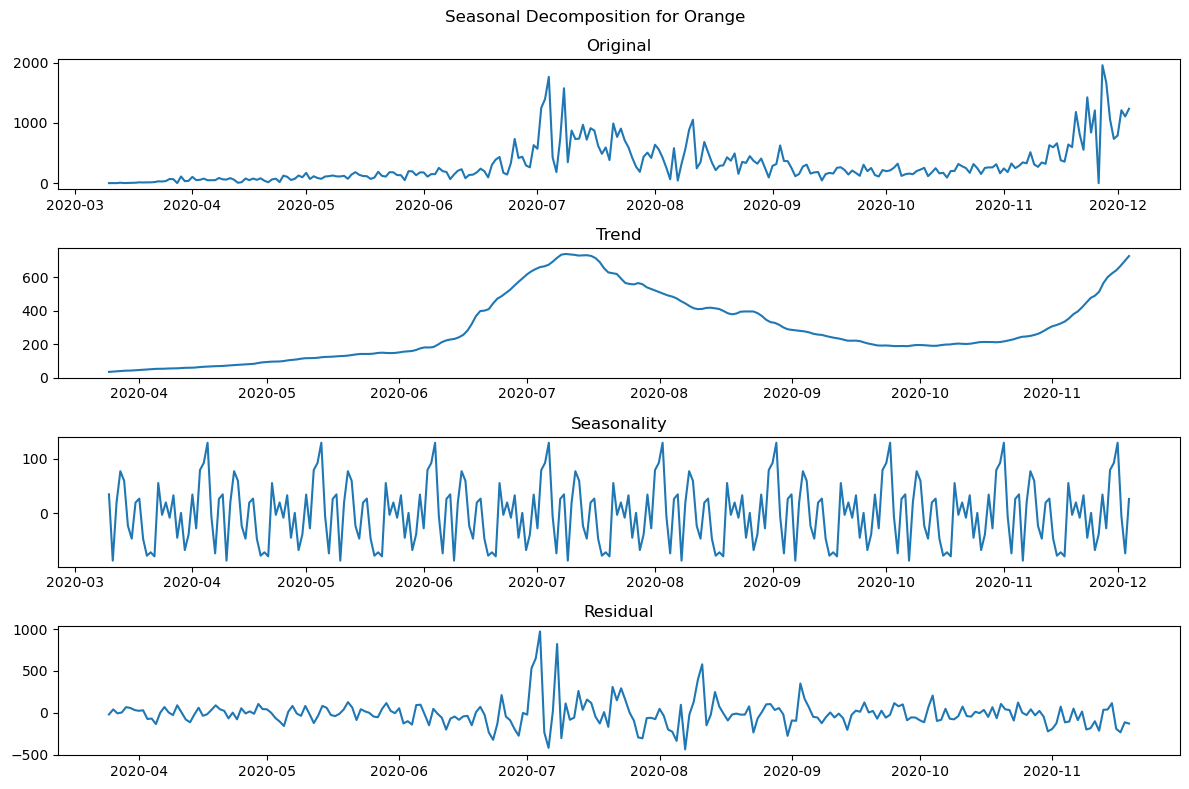

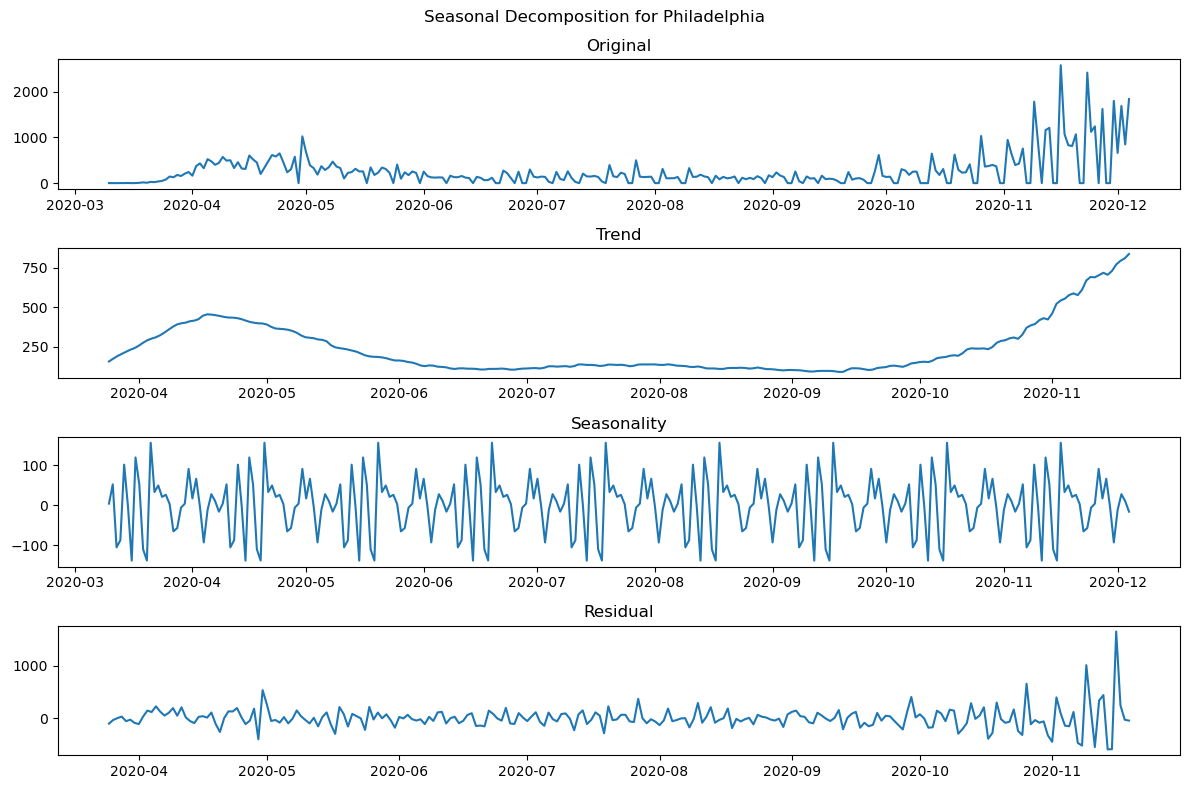

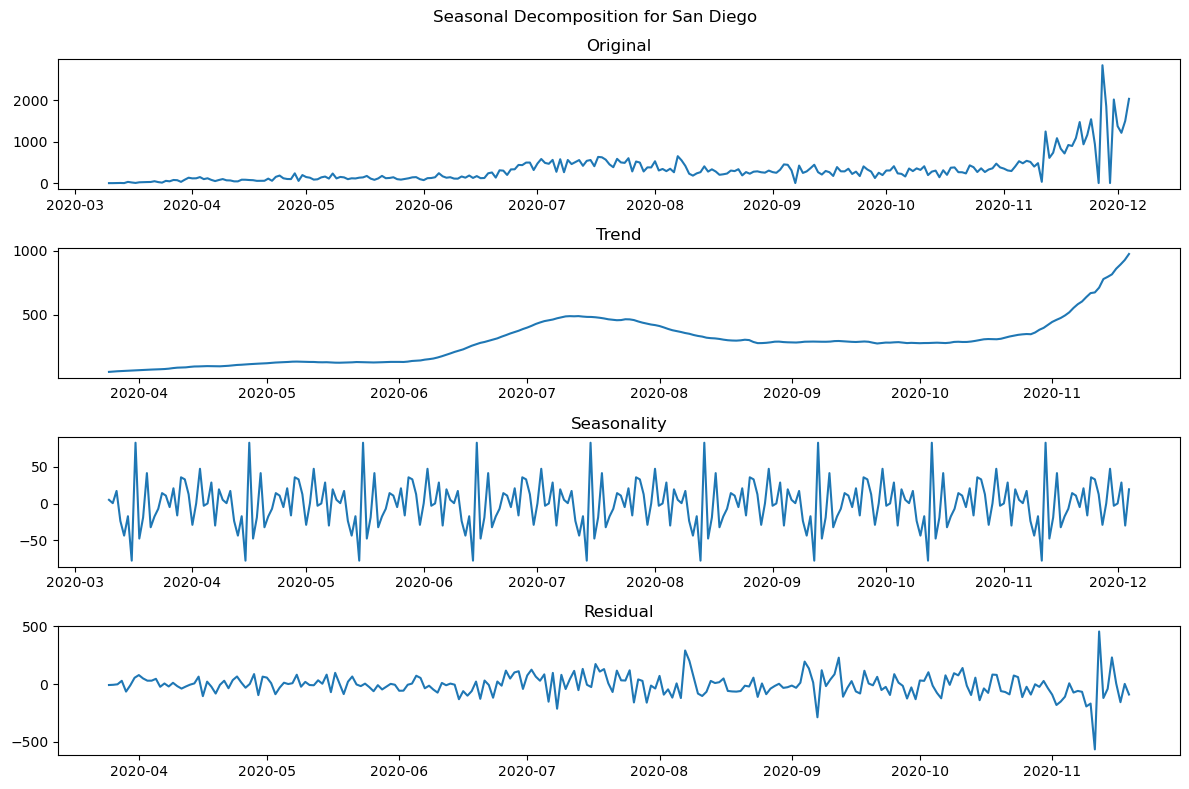

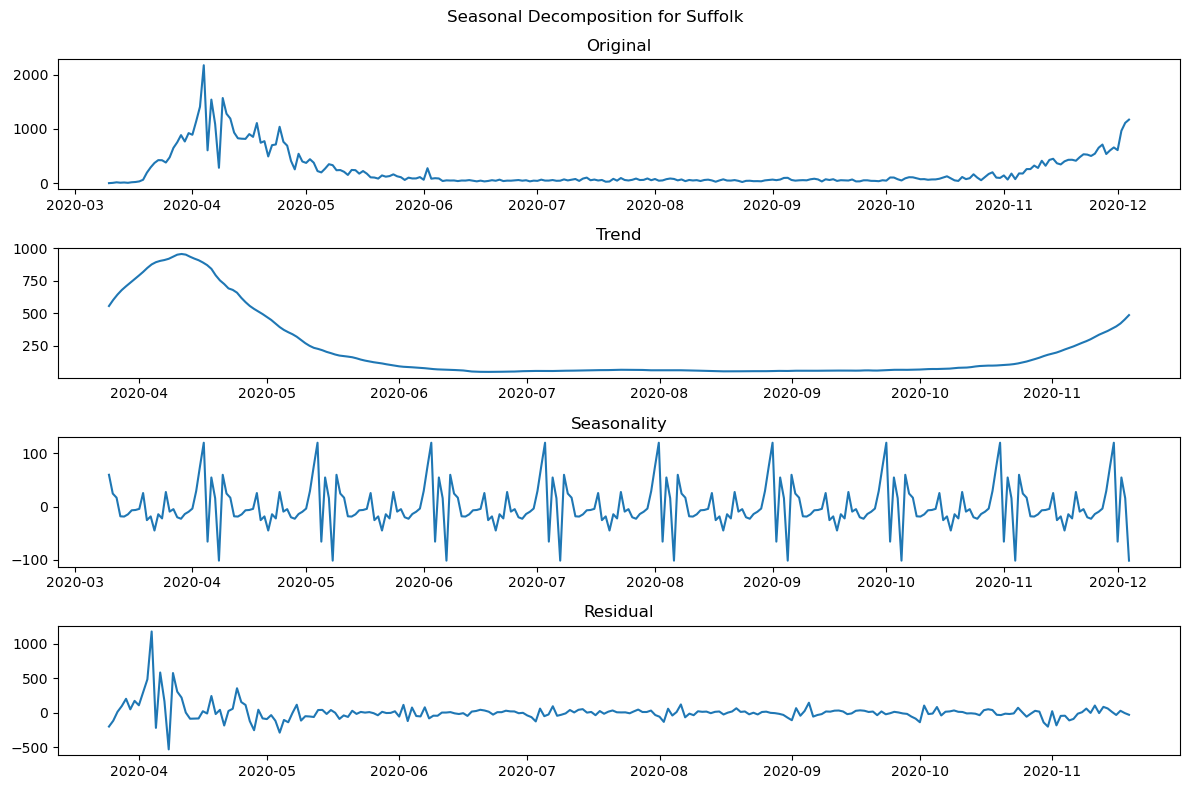

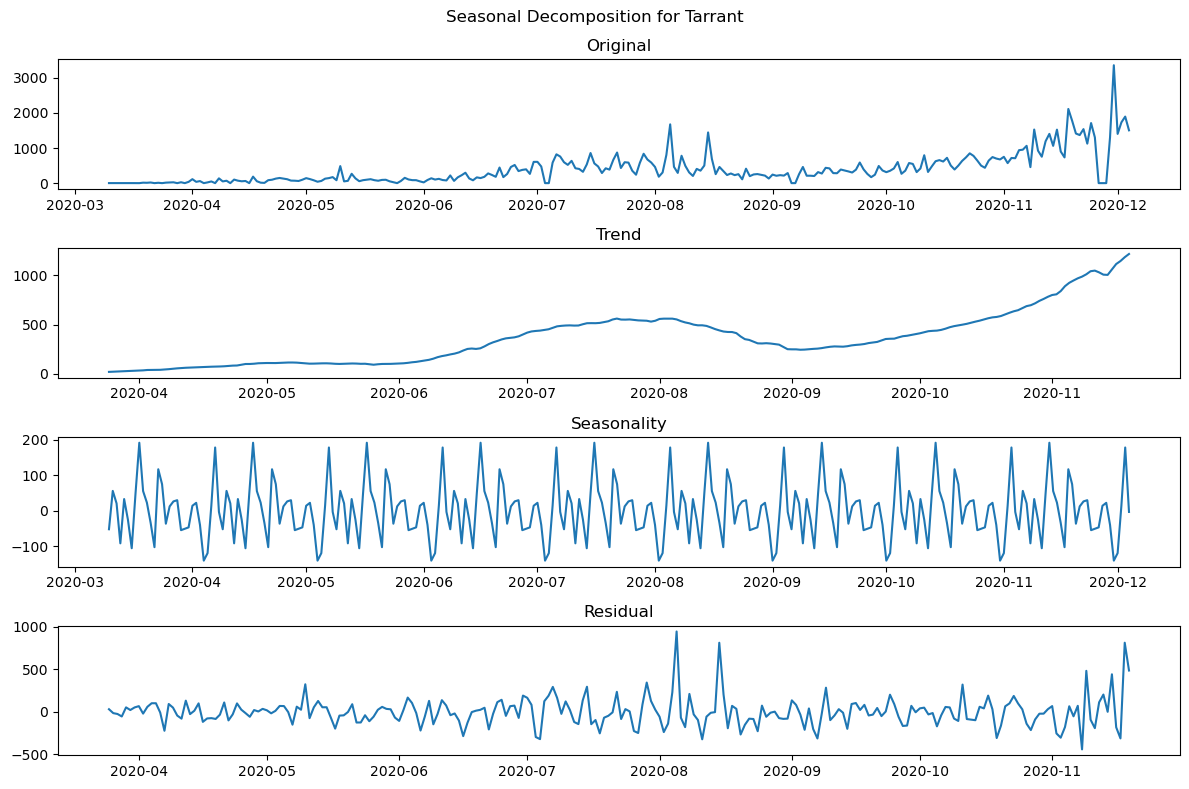

In [6]:
# Ensure 'Date' is in datetime format and set as index
#df.set_index('date', inplace=True)

# Get unique list of counties
counties = df['county'].unique()

# Dictionary to store decomposition results
decomposition_results = {}

# Perform decomposition for each county
for county in counties:
    county_data = df[df['county'] == county]['incremental_cases']
    
    # Handling missing values, if necessary
    #county_data = county_data.interpolate(method='time')
    
    # Seasonal decomposition
    # Adjust the period according to your data's frequency and expected seasonality
    decomposition = seasonal_decompose(county_data.dropna(), model='additive', period=30)
    
    decomposition_results[county] = decomposition

# Now, decomposition_results dictionary contains all the decompositions

# Optional: Plotting the results for each county
for county, decomposed in decomposition_results.items():
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'Seasonal Decomposition for {county}')

    plt.subplot(411)
    plt.plot(decomposed.observed)
    plt.title('Original')

    plt.subplot(412)
    plt.plot(decomposed.trend)
    plt.title('Trend')

    plt.subplot(413)
    plt.plot(decomposed.seasonal)
    plt.title('Seasonality')

    plt.subplot(414)
    plt.plot(decomposed.resid)
    plt.title('Residual')

    plt.tight_layout()
    plt.show()


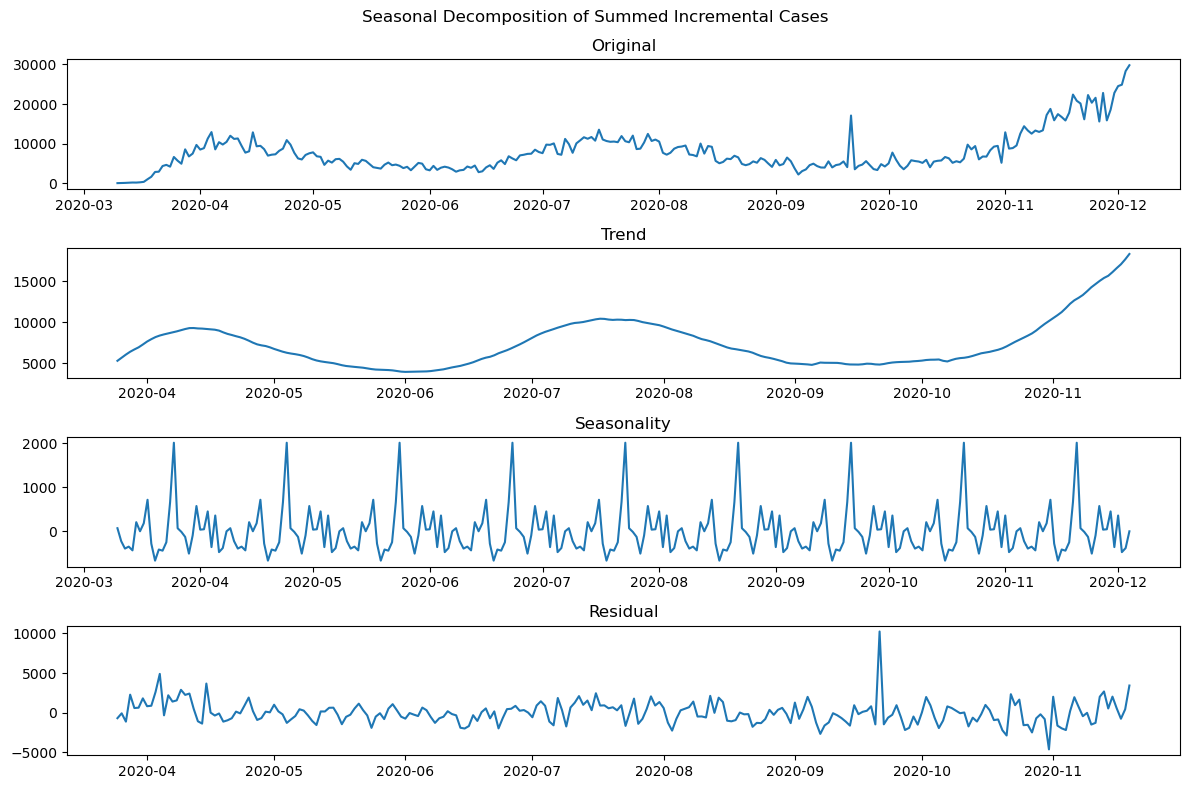

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Sum incremental cases by date
daily_cases_sum = df.groupby('date')['incremental_cases'].sum()

# Perform seasonal decomposition on the aggregated data
decomposition = seasonal_decompose(daily_cases_sum, model='additive', period=30)  # Adjust period based on expected seasonality

# Plotting the decomposition results
plt.figure(figsize=(12, 8))
plt.suptitle('Seasonal Decomposition of Summed Incremental Cases')

plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Original')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()


# 3.  Bivariate Analysis

In [91]:
df = pd.read_csv('variable_selected_county_dataset.csv', parse_dates=['date'])
df['entity']

0       California-Los Angeles
1       California-Los Angeles
2       California-Los Angeles
3       California-Los Angeles
4       California-Los Angeles
                 ...          
3235             Texas-Tarrant
3236             Texas-Tarrant
3237             Texas-Tarrant
3238             Texas-Tarrant
3239             Texas-Tarrant
Name: entity, Length: 3240, dtype: object

In [100]:
df

Unnamed: 0       date   cases stay_at_home_announced  \
0            190 2020-03-10      20                     no   
1            201 2020-03-11      28                     no   
2            213 2020-03-12      32                     no   
3            225 2020-03-13      40                     no   
4            237 2020-03-14      53                     no   
...          ...        ...     ...                    ...   
3235        3380 2020-11-30  100650                    yes   
3236        3392 2020-12-01  102051                    yes   
3237        3404 2020-12-02  103781                    yes   
3238        3416 2020-12-03  105675                    yes   
3239        3428 2020-12-04  107178                    yes   

     stay_at_home_effective  total_population    area_sqmi  \
0                        no        10057155.0  4058.183382   
1                        no        10057155.0  4058.183382   
2                        no        10057155.0  4058.183382   
3                        no        10057155.0  4058.183382   
4                        no        10057155.0  4058.183382   
...                     ...               ...          ...   
3235                    yes         1947529.0   863.649681   
3236                    yes         1947529.0   863.649681   
3237                    yes         1947529.0   863.649681   
3238                    yes         1947529.0   863.649681   
3239                    yes         1947529.0   863.649681   

      population_density_per_sqmi  percent_fair_or_poor_health  \
0                     2478.240645                    16.418669   
1                     2478.240645                    16.418669   
2                     2478.240645                    16.418669   
3                     2478.240645                    16.418669   
4                     2478.240645                    16.418669   
...                           ...                          ...   
3235                  2254.998805                    19.945542   
3236                  2254.998805                    19.945542   
3237                  2254.998805                    19.945542   
3238                  2254.998805                    19.945542   
3239                  2254.998805                    19.945542   

      average_number_of_physically_unhealthy_days  ...  thunder  tornado  \
0                                        3.550138  ...      0.0      0.0   
1                                        3.550138  ...      0.0      0.0   
2                                        3.550138  ...      0.0      0.0   
3                                        3.550138  ...      0.0      0.0   
4                                        3.550138  ...      0.0      0.0   
...                                           ...  ...      ...      ...   
3235                                     3.633687  ...      0.0      0.0   
3236                                     3.633687  ...      0.0      0.0   
3237                                     3.633687  ...      0.0      0.0   
3238                                     3.633687  ...      0.0      0.0   
3239                                     3.633687  ...      0.0      0.0   

      mean_temp_3d_avg  max_temp_3d_avg  min_temp_3d_avg  dewpoint_3d_avg  \
0            61.366667        67.400000        53.600000        47.000000   
1            60.666667        66.800000        54.200000        51.566667   
2            57.033333        62.600000        52.400000        50.833333   
3            53.933333        58.400000        50.600000        50.800000   
4            53.400000        55.400000        51.800000        48.866667   
...                ...              ...              ...              ...   
3235         42.966667        52.633333        33.333333        29.666667   
3236         43.166667        54.300000        32.666667        26.733333   
3237         43.133333        53.266667        34.366667        30.100000   
3238         42.400000        47.633333 

### Correlaiton matrix per county with static variables, therefore is not as efffective

Correlation matrix for California-Los Angeles:


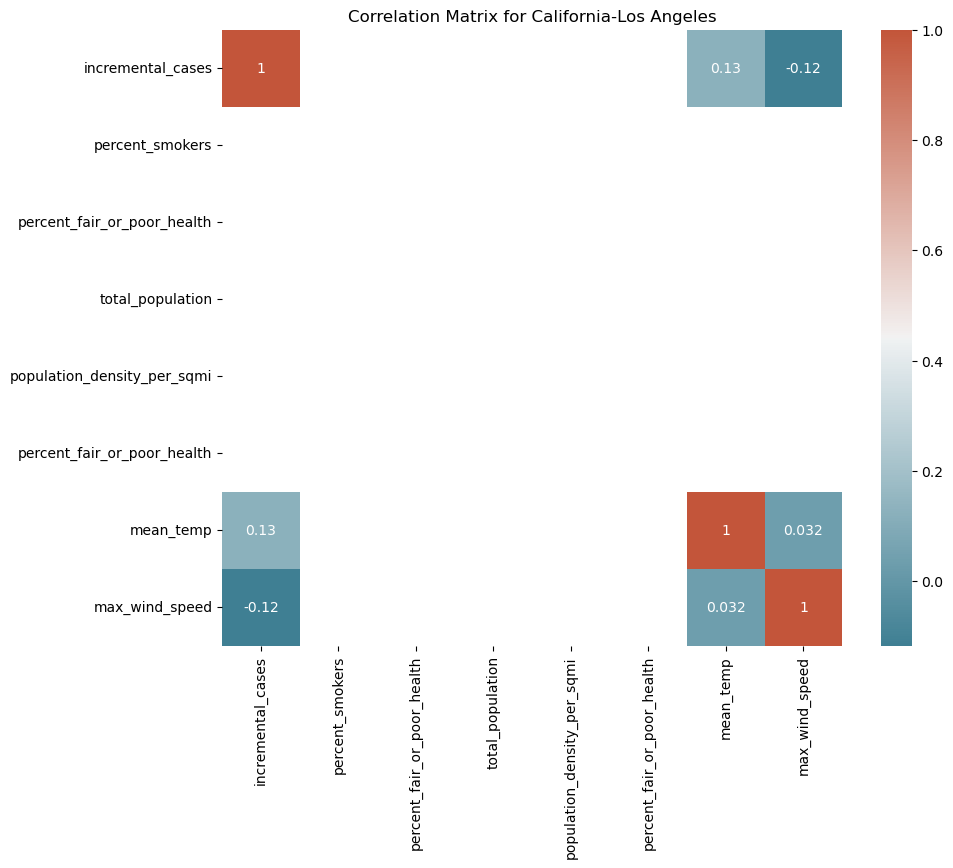

Correlation matrix for California-Orange:


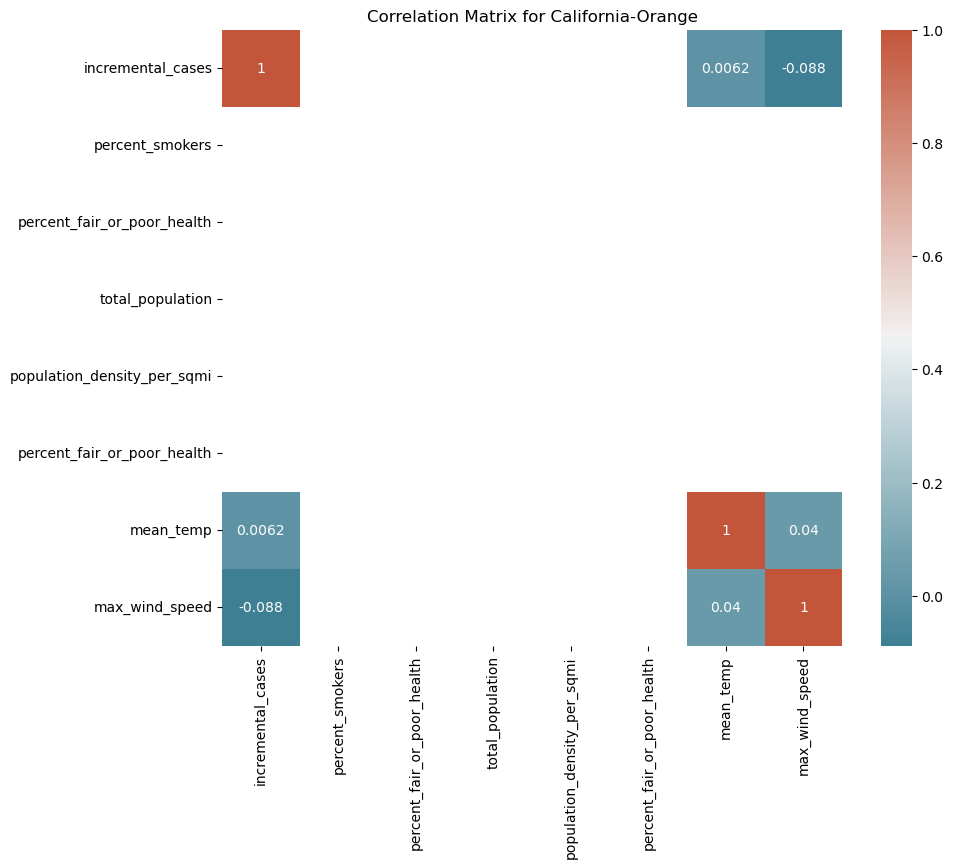

Correlation matrix for California-San Diego:


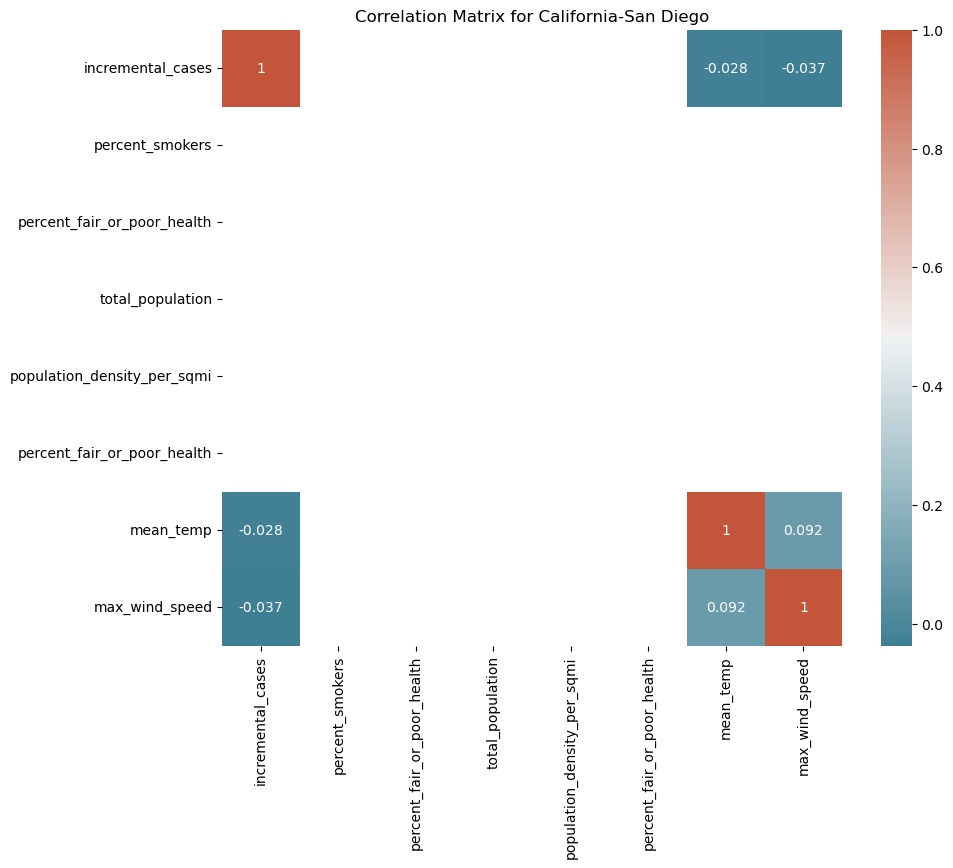

Correlation matrix for Florida-Miami-Dade:


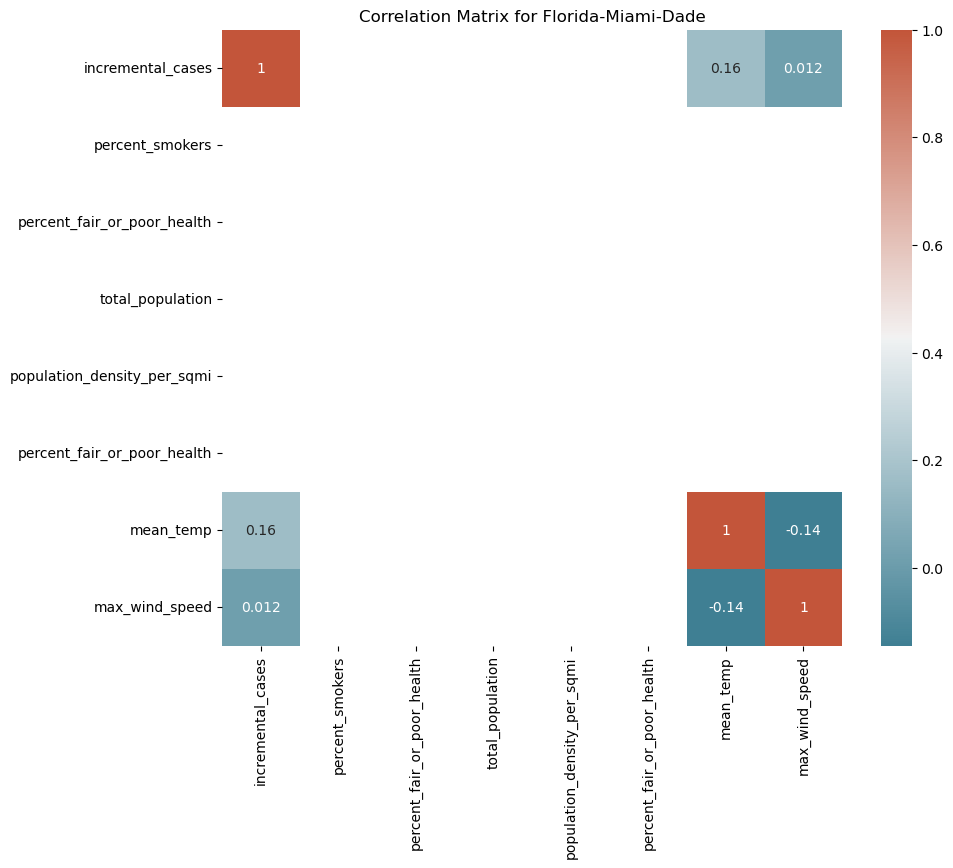

Correlation matrix for Illinois-Cook:


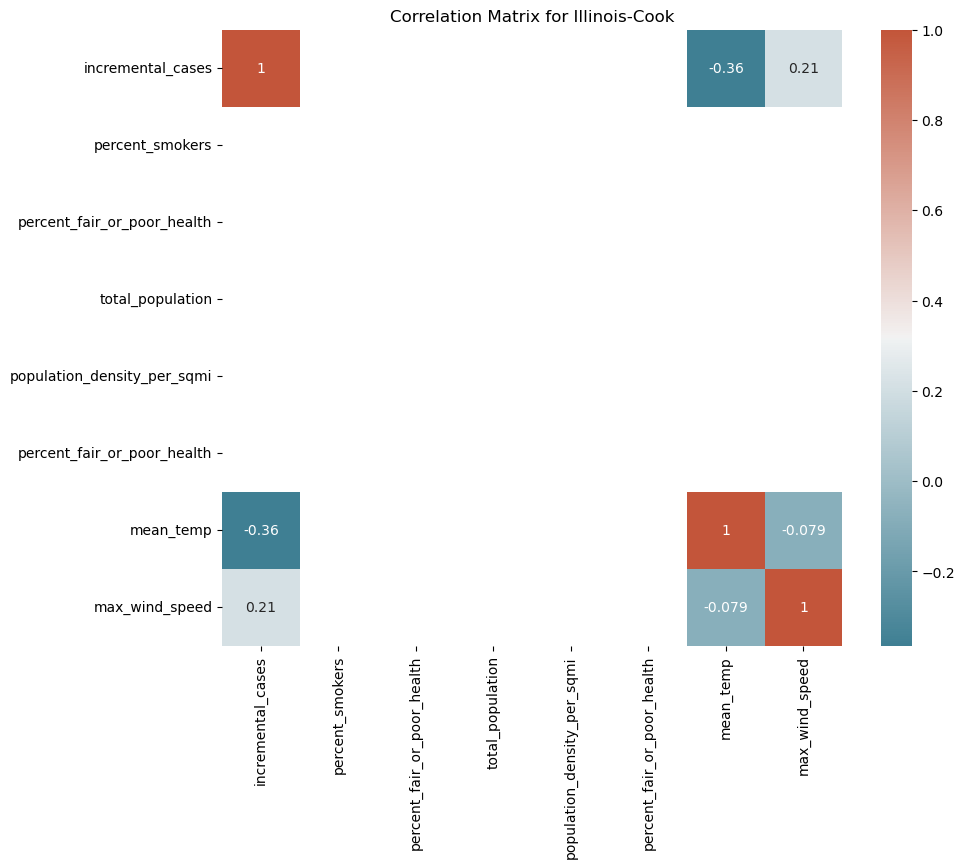

Correlation matrix for Nevada-Clark:


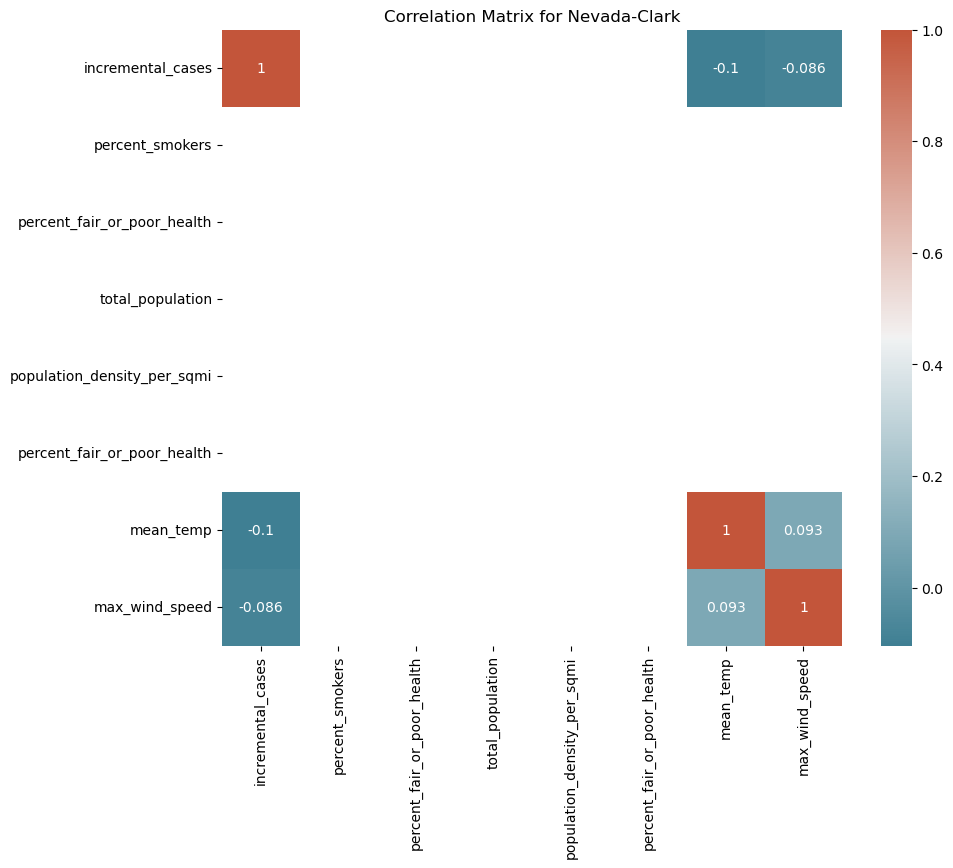

Correlation matrix for New York-Nassau:


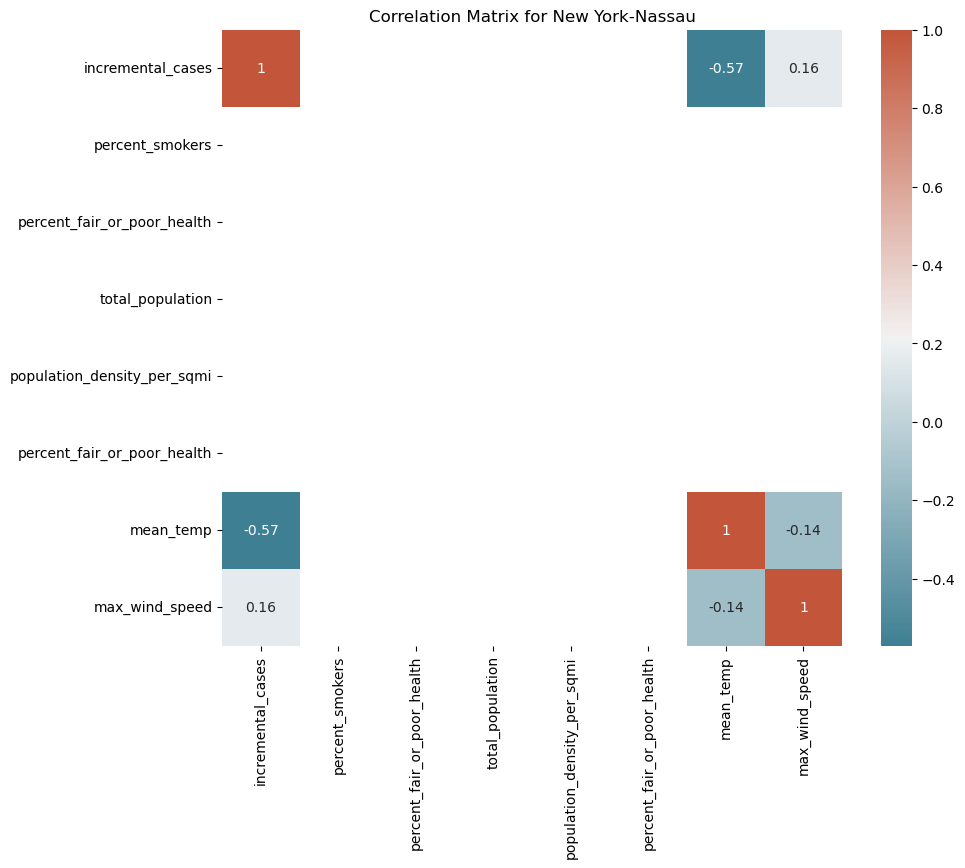

Correlation matrix for New York-New York City:


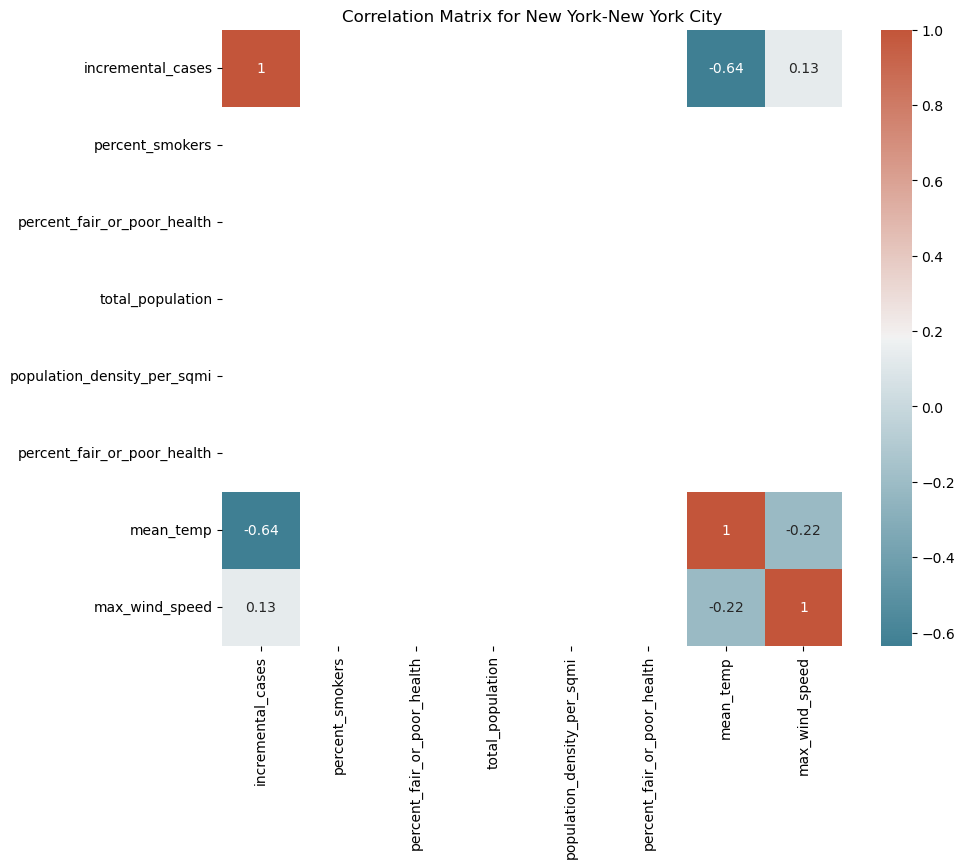

Correlation matrix for New York-Suffolk:


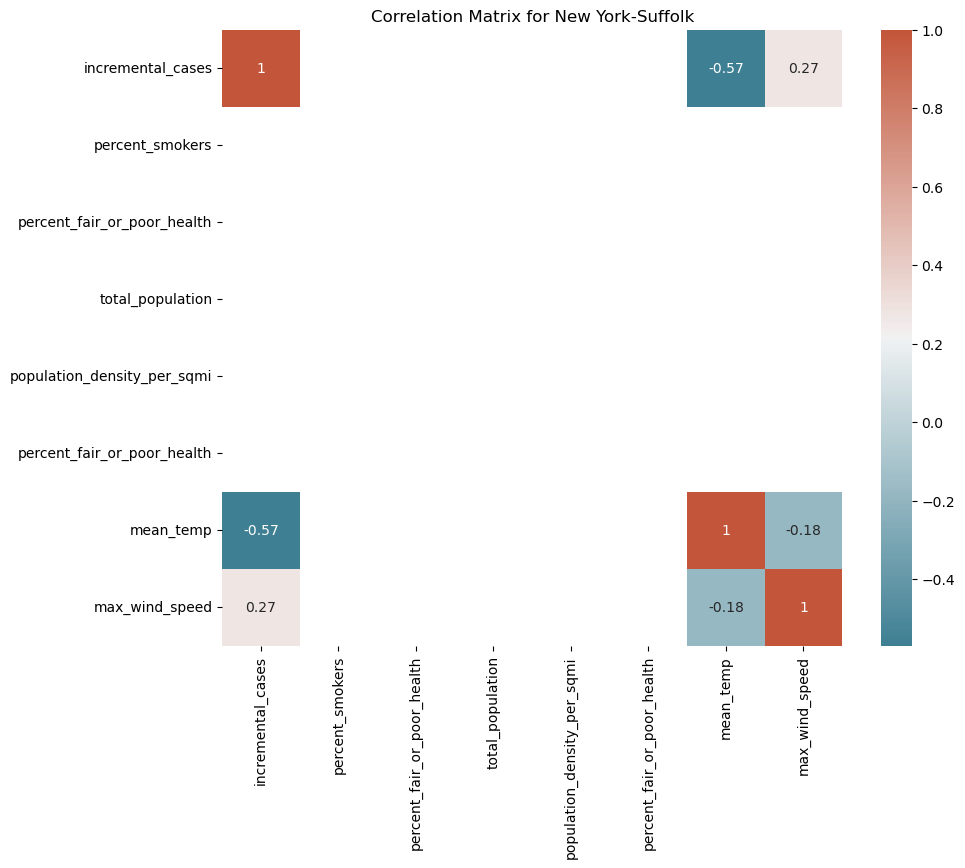

Correlation matrix for Pennsylvania-Philadelphia:


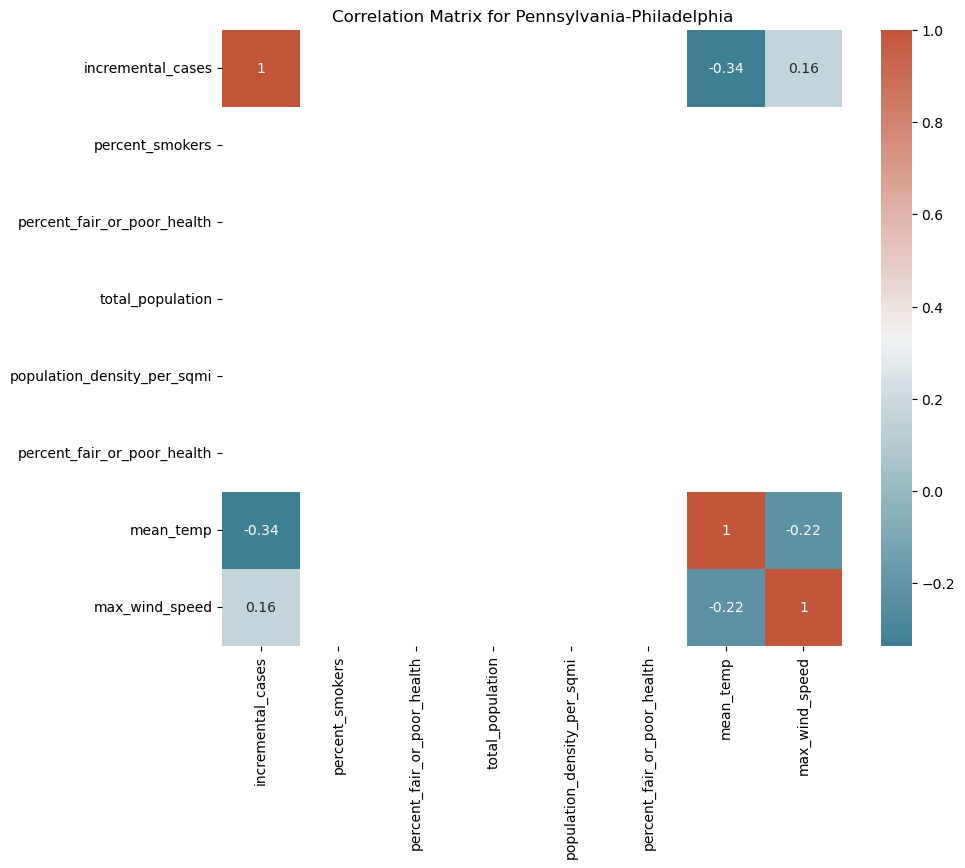

Correlation matrix for Texas-Harris:


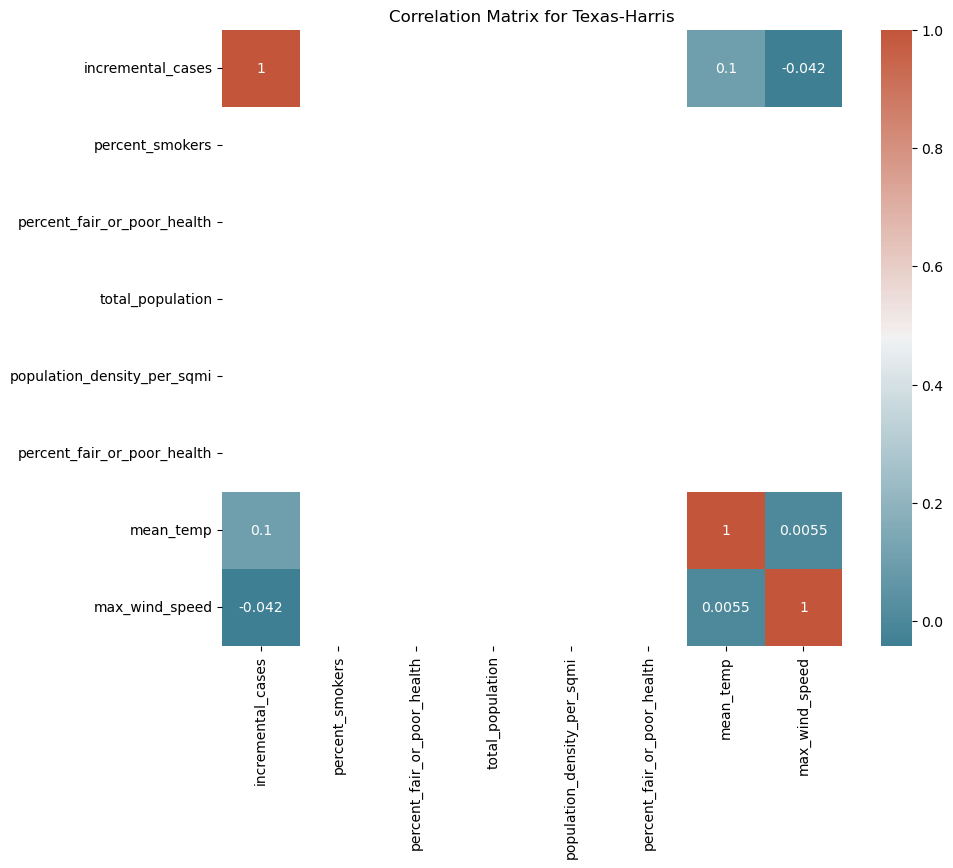

Correlation matrix for Texas-Tarrant:


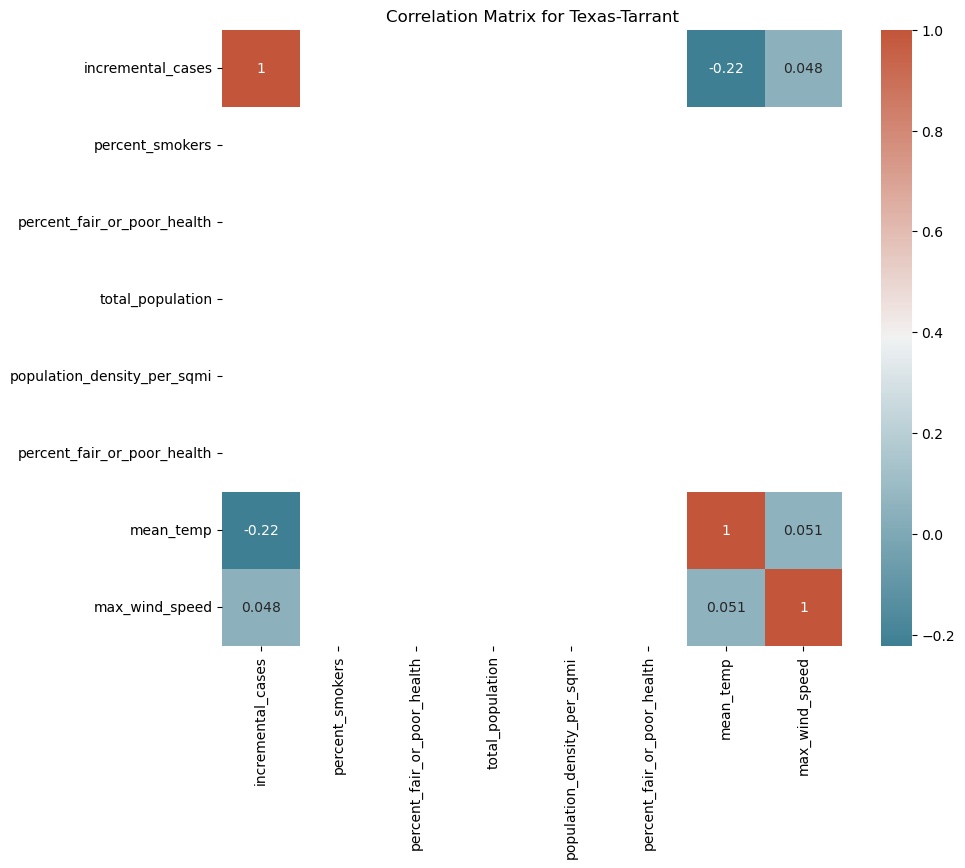

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# List of numeric columns you want to correlate, replace these with your actual column names
columns_to_include = ['incremental_cases', 'percent_smokers', 'percent_fair_or_poor_health', 'total_population', 'population_density_per_sqmi', 'percent_fair_or_poor_health', 'mean_temp', 'max_wind_speed']

# Group the DataFrame by 'County' and then calculate and plot correlation matrix for each group
for county, group_df in df.groupby('entity'):
    # Select the numeric columns for the correlation matrix
    numeric_df = group_df[columns_to_include]
    
    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Optionally, print the county name and its correlation matrix
    print(f"Correlation matrix for {county}:")
    #print(corr_matrix)

    # Visualization with a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
    plt.title(f'Correlation Matrix for {county}')
    plt.show()


### Correlaiton matrix with dynamic variables weather

Correlation matrix for California-Los Angeles:


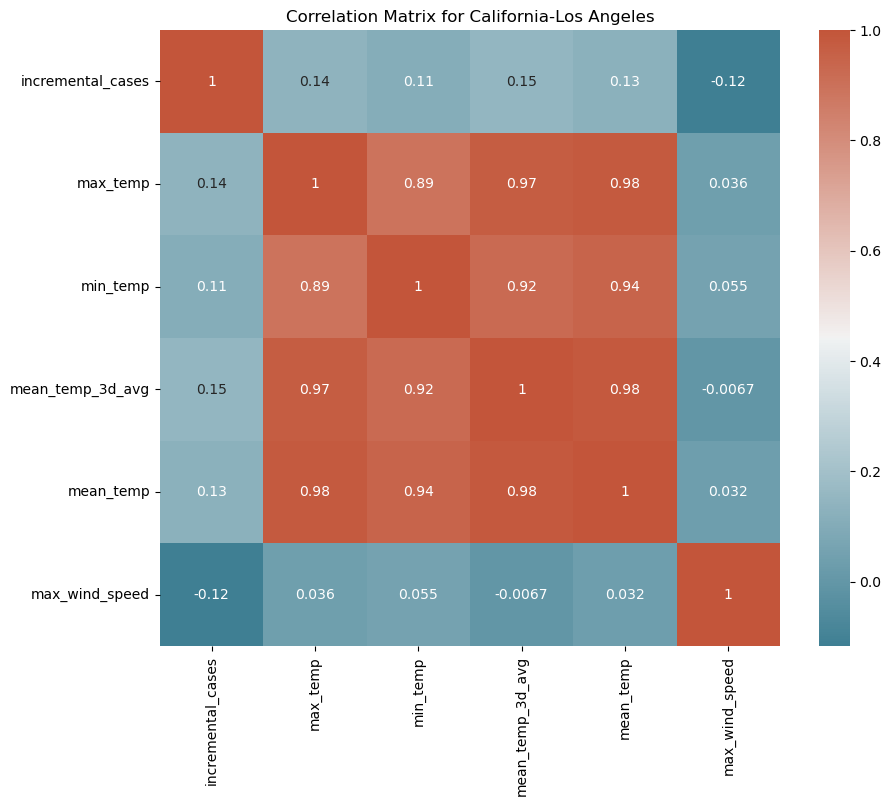

Correlation matrix for California-Orange:


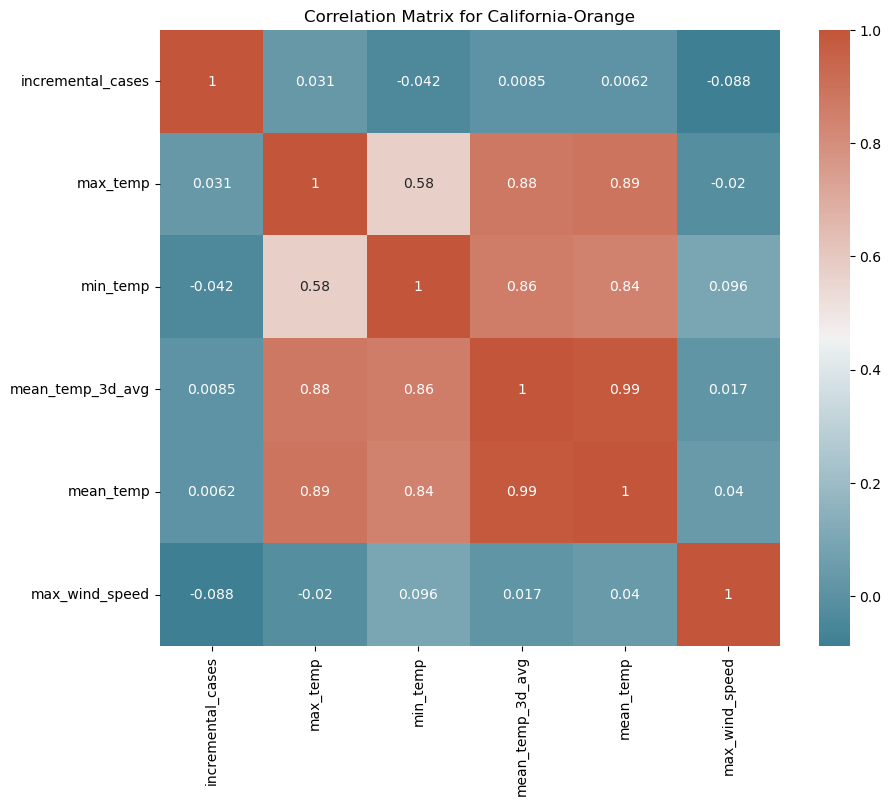

Correlation matrix for California-San Diego:


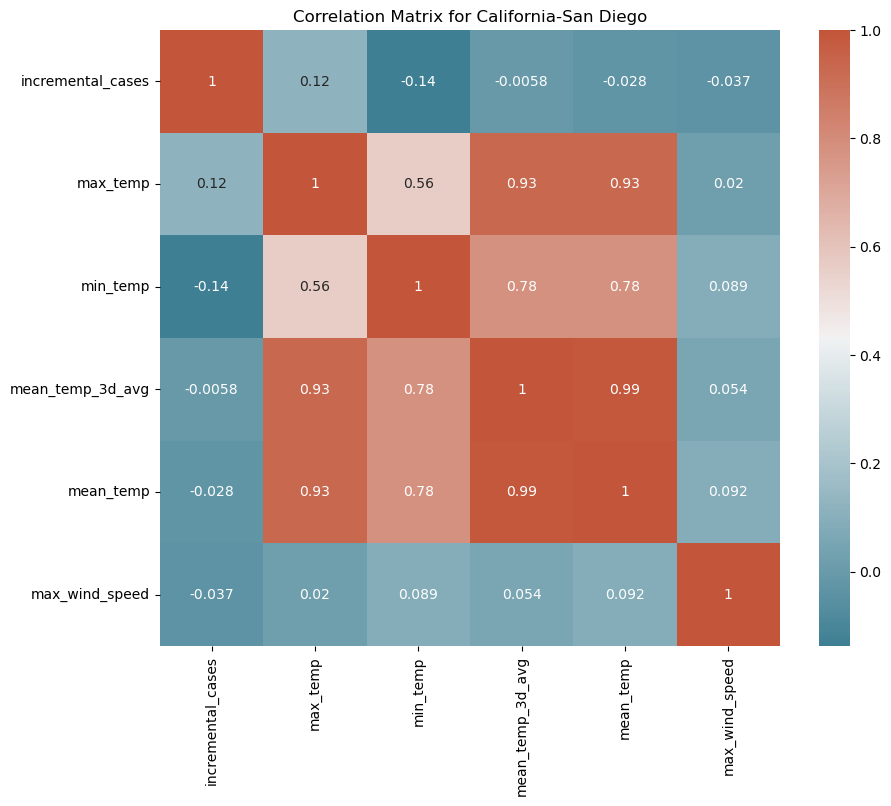

Correlation matrix for Florida-Miami-Dade:


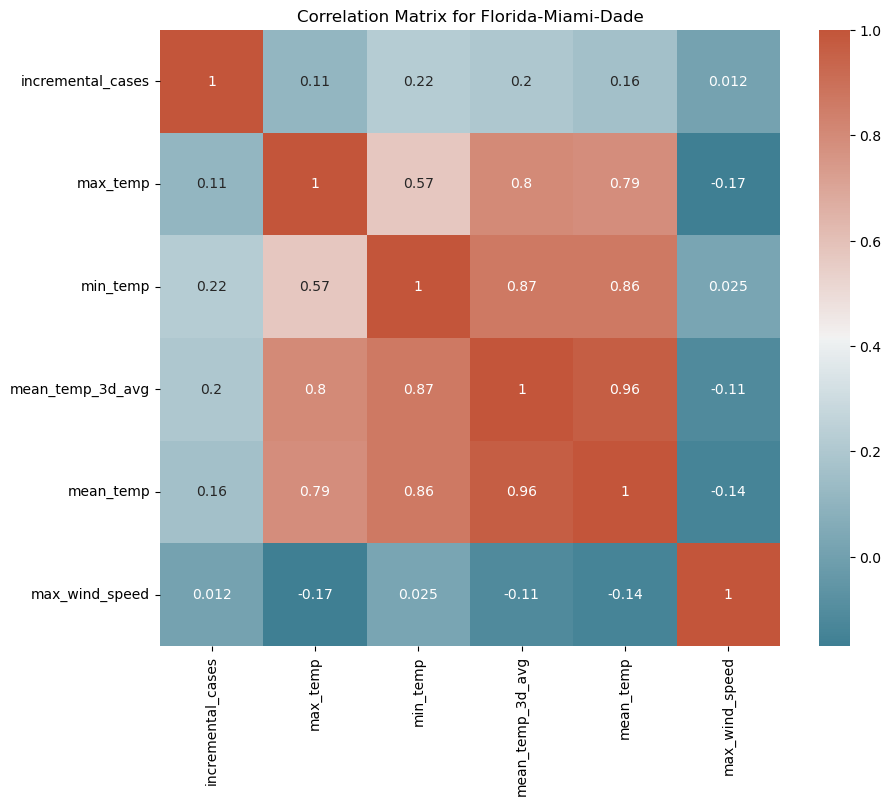

Correlation matrix for Illinois-Cook:


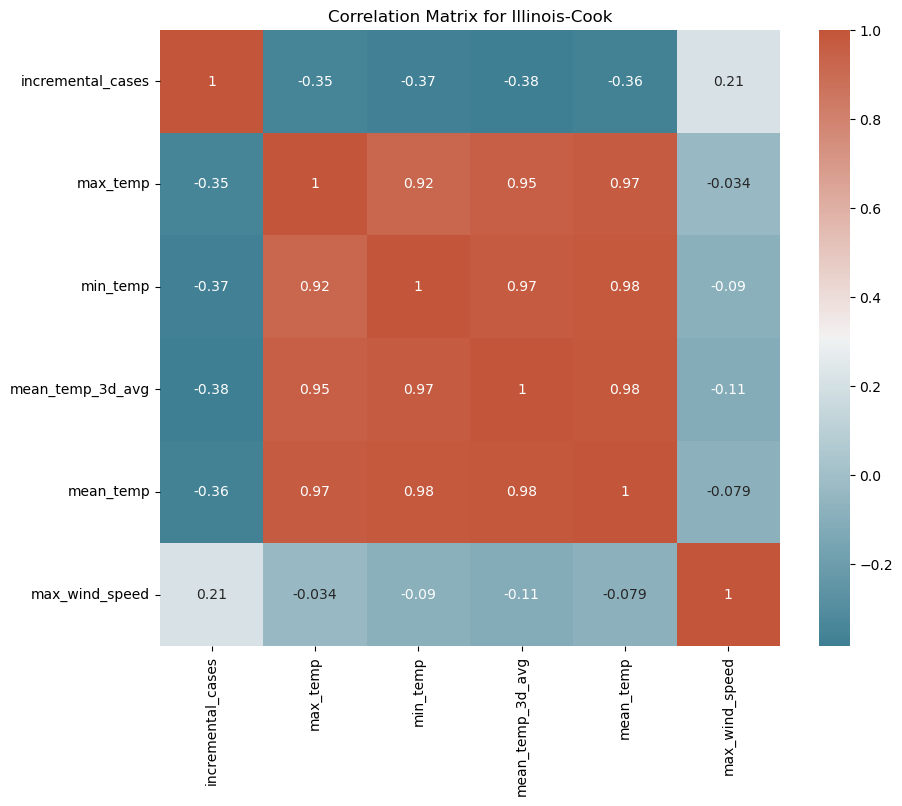

Correlation matrix for Nevada-Clark:


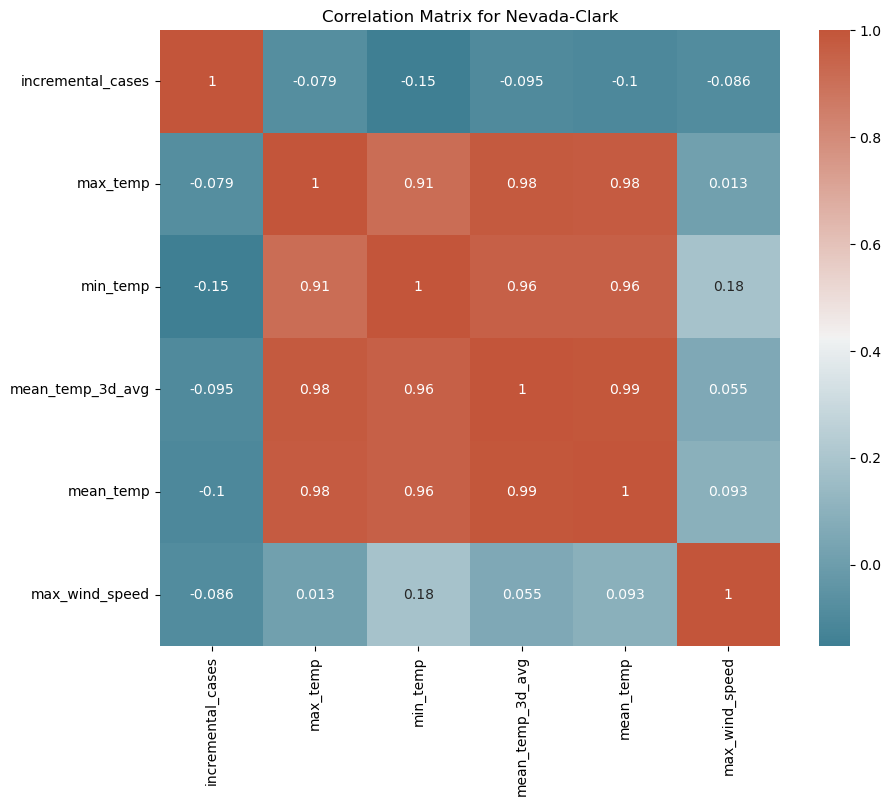

Correlation matrix for New York-Nassau:


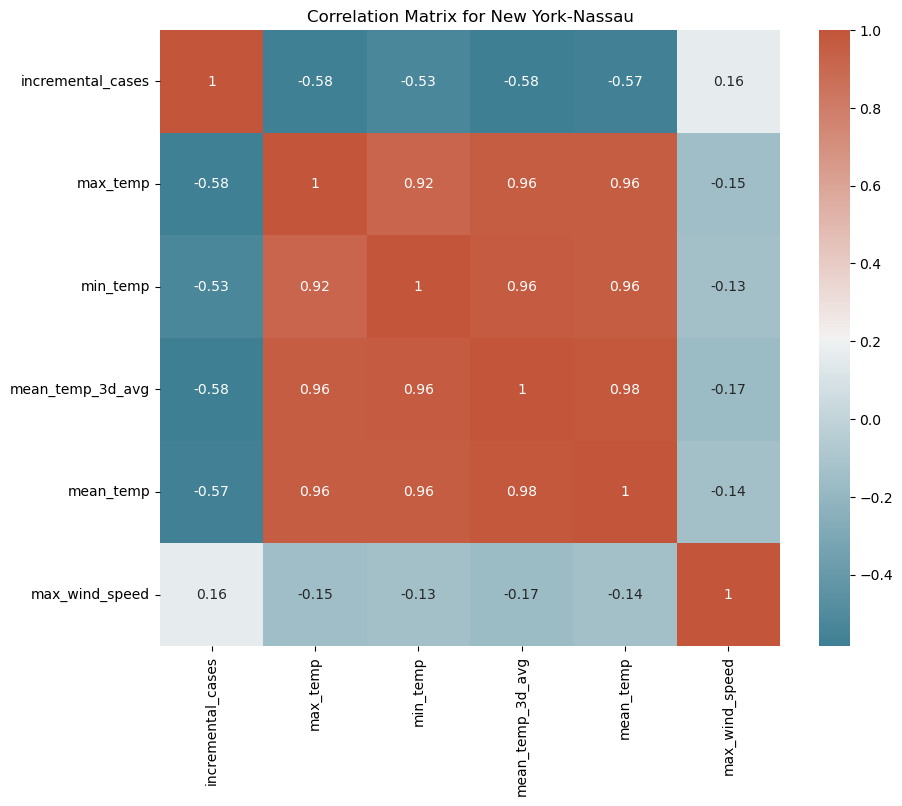

Correlation matrix for New York-New York City:


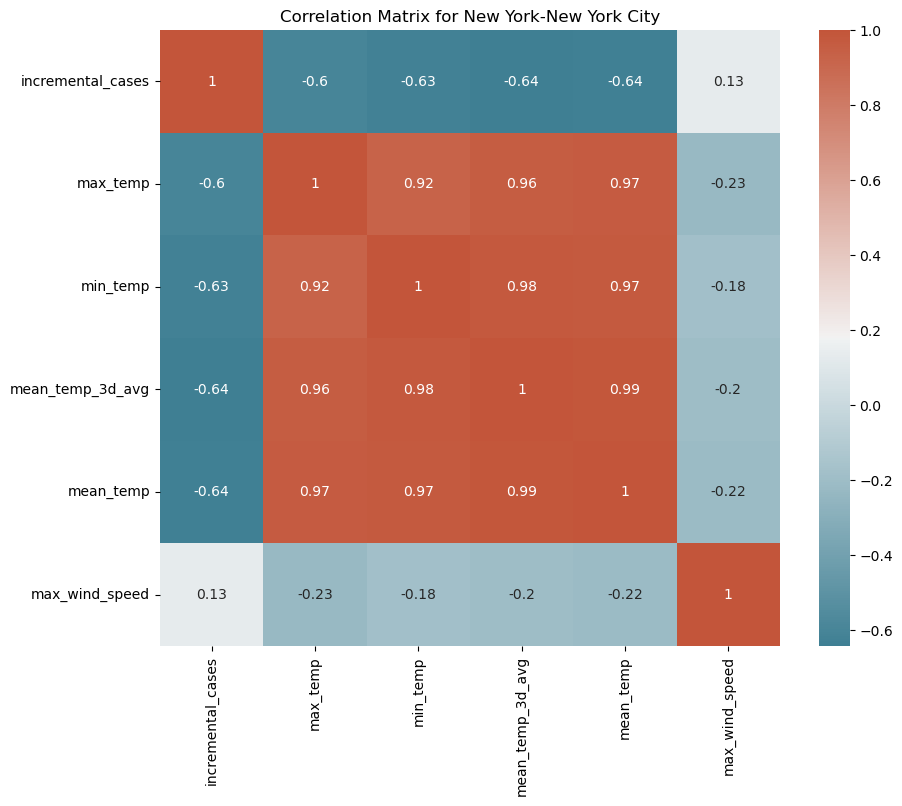

Correlation matrix for New York-Suffolk:


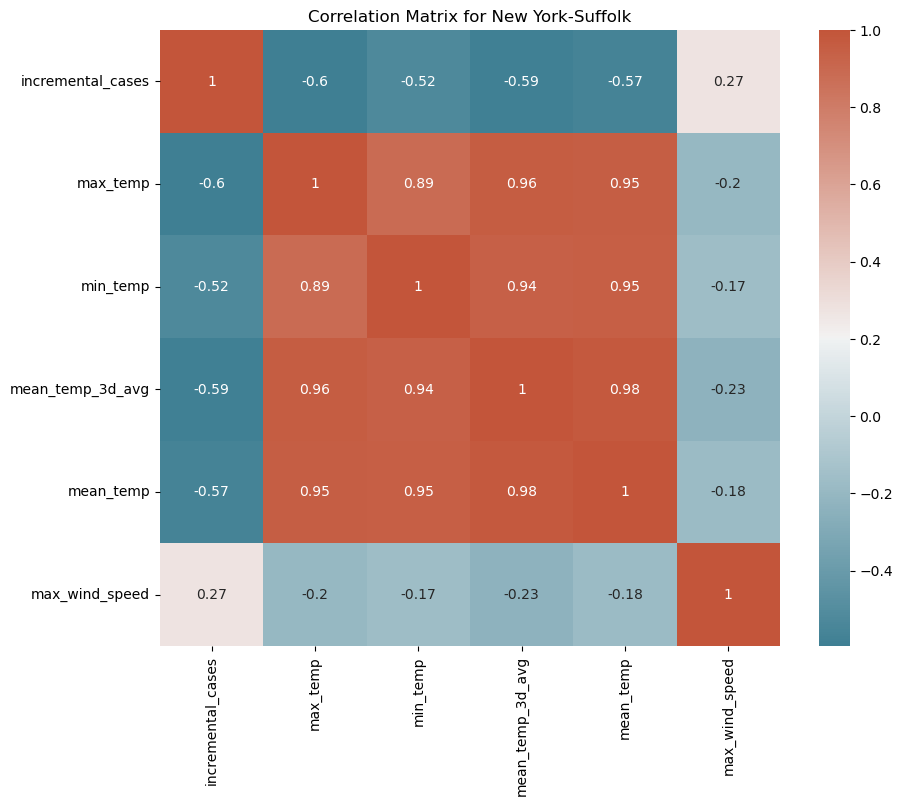

Correlation matrix for Pennsylvania-Philadelphia:


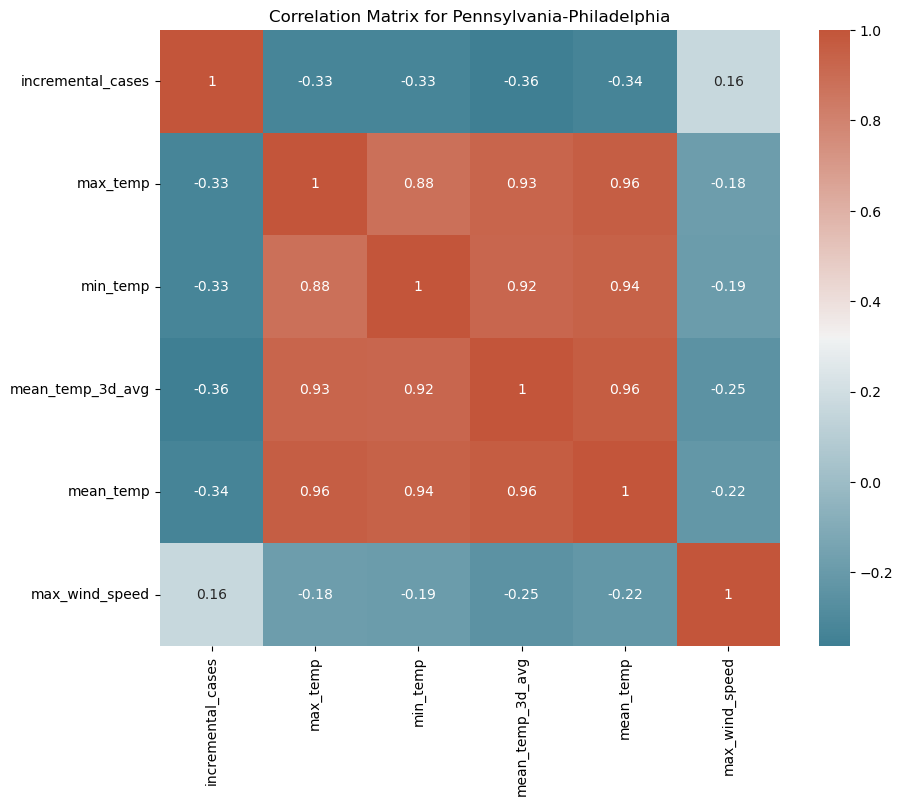

Correlation matrix for Texas-Harris:


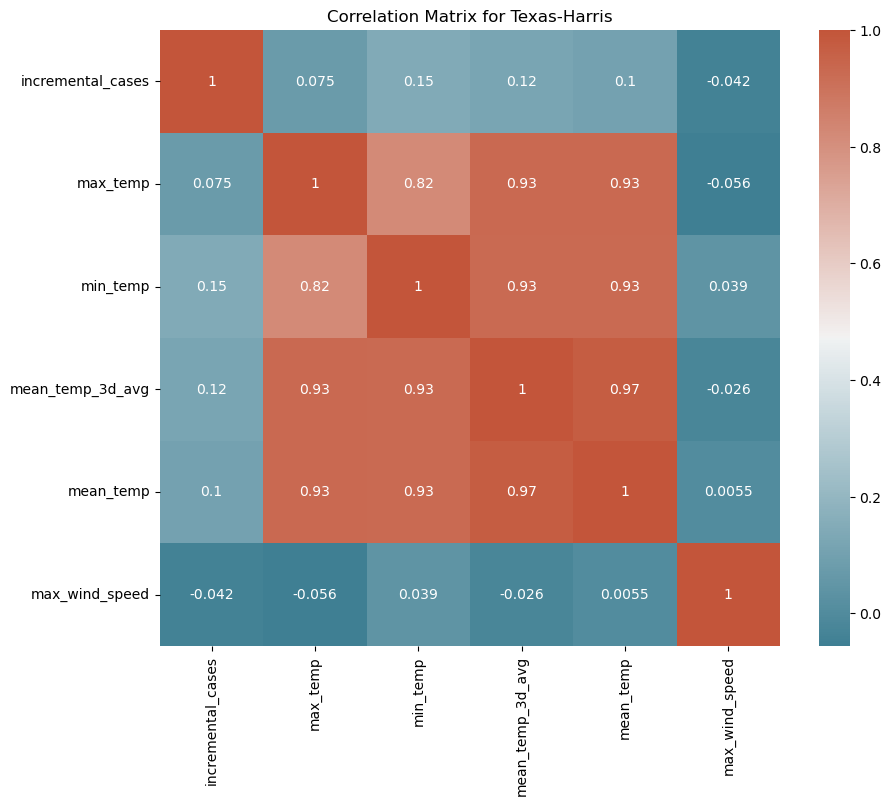

Correlation matrix for Texas-Tarrant:


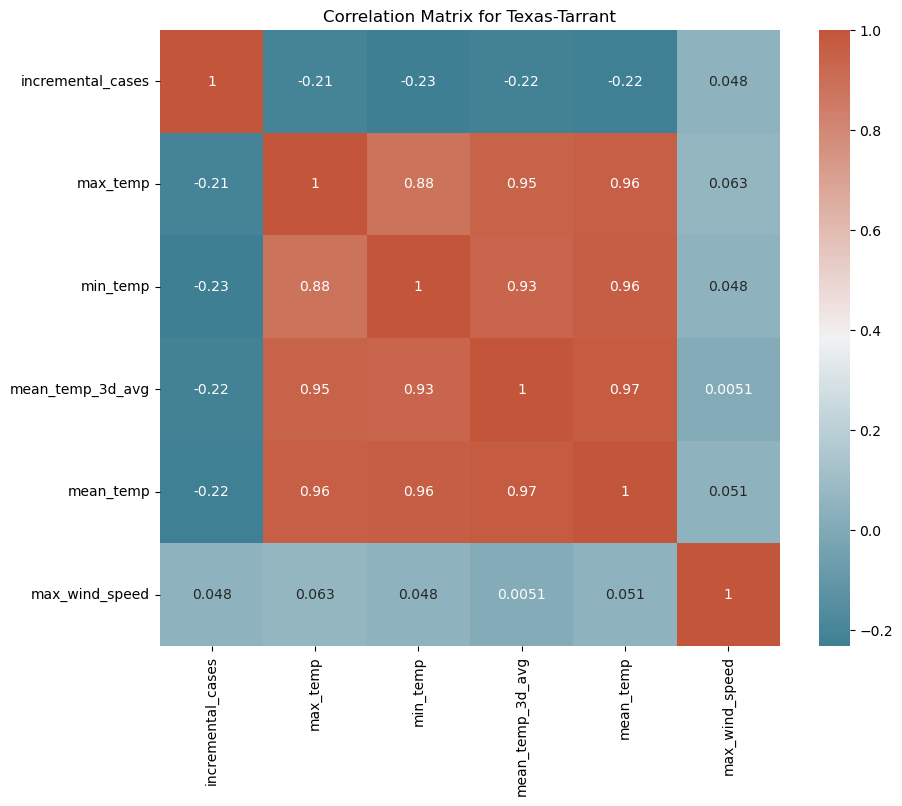

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# List of numeric columns you want to correlate, replace these with your actual column names
columns_to_include = ['incremental_cases', 'max_temp', 'min_temp', 'mean_temp_3d_avg', 'mean_temp', 'max_wind_speed']

# Group the DataFrame by 'County' and then calculate and plot correlation matrix for each group
for county, group_df in df.groupby('entity'):
    # Select the numeric columns for the correlation matrix
    numeric_df = group_df[columns_to_include]
    
    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Optionally, print the county name and its correlation matrix
    print(f"Correlation matrix for {county}:")
    #print(corr_matrix)

    # Visualization with a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
    plt.title(f'Correlation Matrix for {county}')
    plt.show()

                   incremental_cases  max_temp  min_temp  mean_temp_3d_avg  \
incremental_cases           1.000000 -0.150521 -0.081181         -0.110319   
max_temp                   -0.150521  1.000000  0.812461          0.936987   
min_temp                   -0.081181  0.812461  1.000000          0.927409   
mean_temp_3d_avg           -0.110319  0.936987  0.927409          1.000000   
mean_temp                  -0.112081  0.944372  0.933025          0.986092   
max_wind_speed             -0.014594 -0.021345  0.013275         -0.035396   

                   mean_temp  max_wind_speed  
incremental_cases  -0.112081       -0.014594  
max_temp            0.944372       -0.021345  
min_temp            0.933025        0.013275  
mean_temp_3d_avg    0.986092       -0.035396  
mean_temp           1.000000       -0.015135  
max_wind_speed     -0.015135        1.000000  


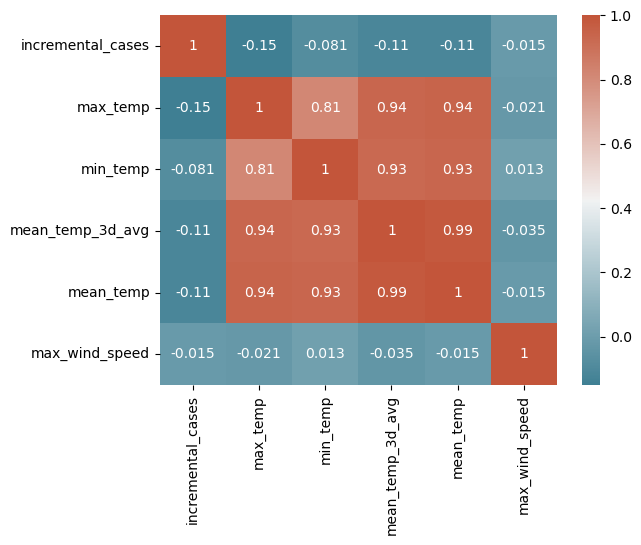

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# List of numeric columns you want to correlate, replace these with your actual column names
columns_to_include = ['incremental_cases', 'max_temp', 'min_temp', 'mean_temp_3d_avg', 'mean_temp', 'max_wind_speed']

# Select the specified columns
selected_columns_df = df[columns_to_include]

# Calculate the correlation matrix for the selected columns
corr_matrix = selected_columns_df.corr()

# Output the correlation matrix to the console
print(corr_matrix)


# Create a heatmap
sns.heatmap(corr_matrix, xticklabels=columns_to_include, yticklabels=columns_to_include, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# Show the plot
plt.show()

### Correlaiton matrix with all counties with dynamic + static variables (not as useful)

                             incremental_cases  percent_fair_or_poor_health  \
incremental_cases                     1.000000                     0.105912   
percent_fair_or_poor_health           0.105912                     1.000000   
total_population                      0.432127                    -0.025321   
population_density_per_sqmi           0.147420                     0.075935   
percent_fair_or_poor_health           0.105912                     1.000000   
mean_temp                            -0.112081                     0.299553   
max_wind_speed                       -0.014594                     0.178957   

                             total_population  population_density_per_sqmi  \
incremental_cases                    0.432127                     0.147420   
percent_fair_or_poor_health         -0.025321                     0.075935   
total_population                     1.000000                     0.434963   
population_density_per_sqmi          0.434963          

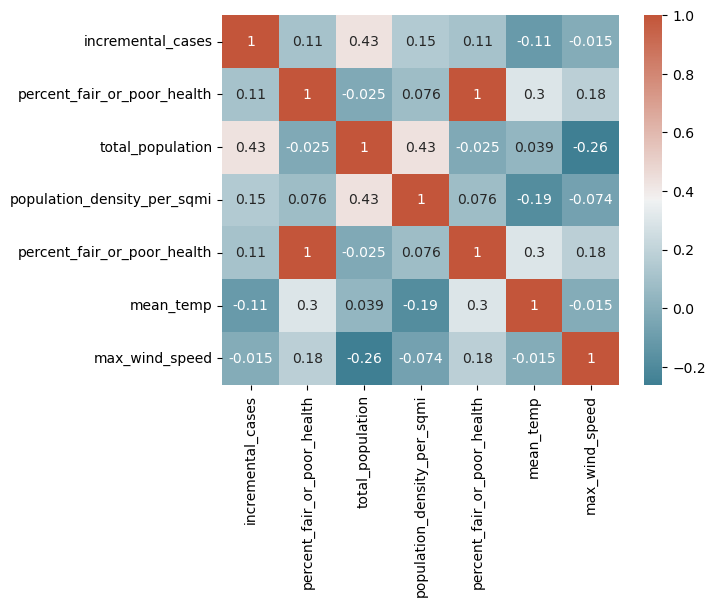

In [107]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Define a list of column names that you want to include in the correlation matrix
columns_to_include = ['incremental_cases', 'percent_fair_or_poor_health', 'total_population', 'population_density_per_sqmi', 'percent_fair_or_poor_health', 'mean_temp', 'max_wind_speed']

# Select the specified columns
selected_columns_df = df[columns_to_include]

# Calculate the correlation matrix for the selected columns
corr_matrix = selected_columns_df.corr()

# Output the correlation matrix to the console
print(corr_matrix)


# Create a heatmap
sns.heatmap(corr_matrix, xticklabels=columns_to_include, yticklabels=columns_to_include, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# Show the plot
plt.show()

### Scatterplots eith static variables

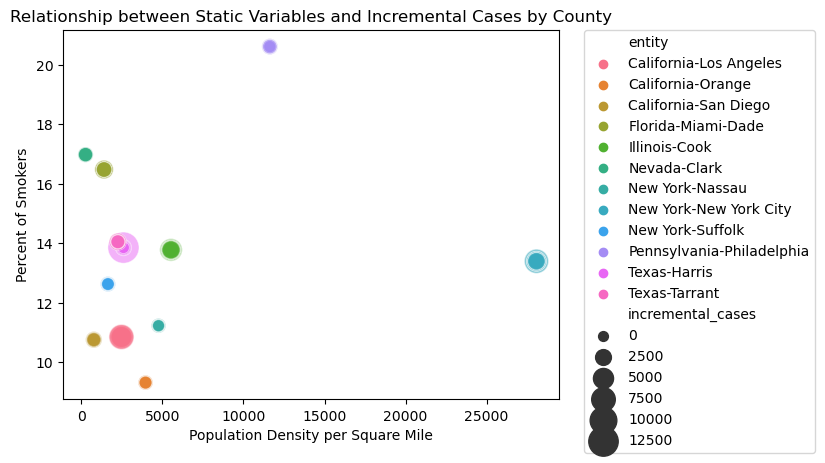

In [131]:
sns.scatterplot(
    data=df,
    x='population_density_per_sqmi',
    y='percent_smokers',
    size='incremental_cases',
    hue='entity',
    sizes=(50, 500),  # Increase the min and max size of the bubbles
    alpha=0.5
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Relationship between Static Variables and Incremental Cases by County')
plt.xlabel('Population Density per Square Mile')
plt.ylabel('Percent of Smokers')
plt.show()

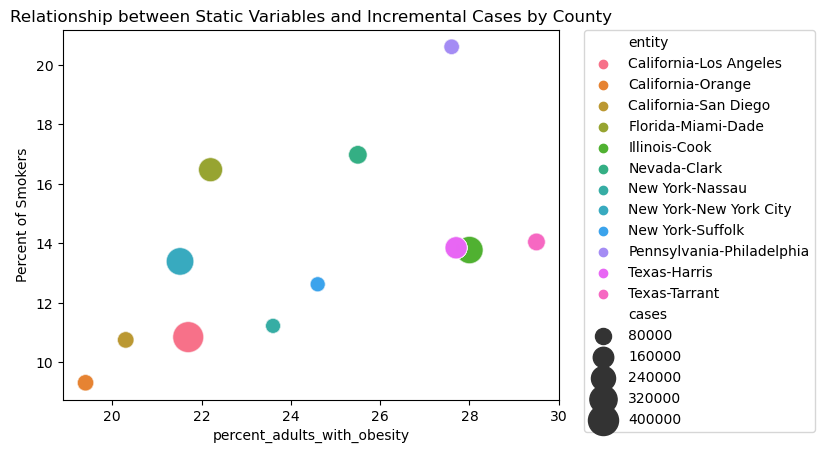

In [133]:
sns.scatterplot(
    data=df,
    x='percent_adults_with_obesity',
    y='percent_smokers',
    size='cases',
    hue='entity',
    sizes=(50, 500),  # Increase the min and max size of the bubbles
    alpha=0.5
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Relationship between Static Variables and Incremental Cases by County')
plt.xlabel('percent_adults_with_obesity')
plt.ylabel('Percent of Smokers')
plt.show()

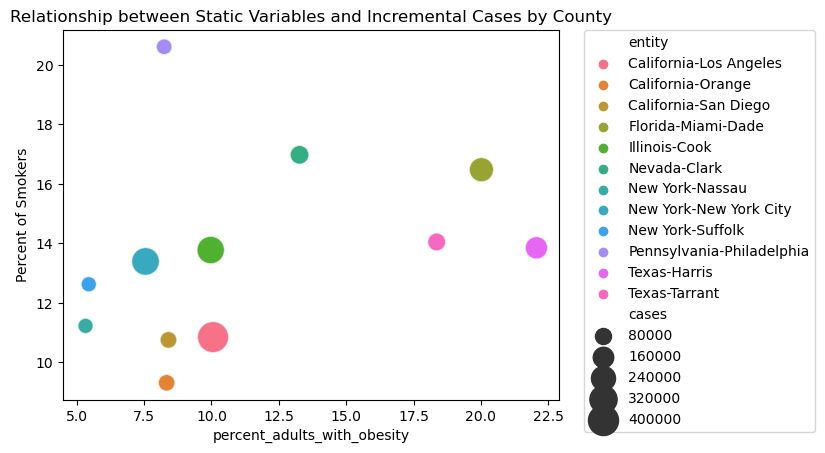

In [134]:
sns.scatterplot(
    data=df,
    x='percent_uninsured',
    y='percent_smokers',
    size='cases',
    hue='entity',
    sizes=(50, 500),  # Increase the min and max size of the bubbles
    alpha=0.5
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Relationship between Static Variables and Incremental Cases by County')
plt.xlabel('percent_adults_with_obesity')
plt.ylabel('Percent of Smokers')
plt.show()

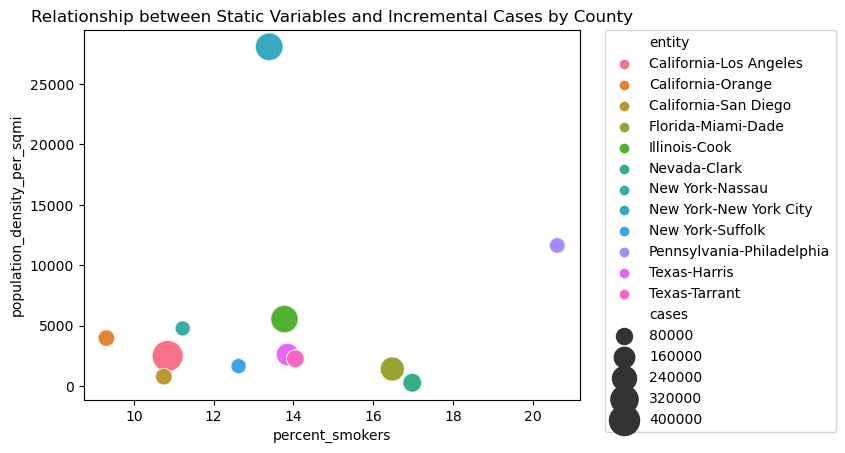

In [139]:
sns.scatterplot(
    data=df,
    x='percent_smokers',
    y='population_density_per_sqmi',
    size='cases',
    hue='entity',
    sizes=(50, 500),  # Increase the min and max size of the bubbles
    alpha=0.5
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Relationship between Static Variables and Incremental Cases by County')
plt.xlabel('percent_smokers')
plt.ylabel('population_density_per_sqmi')
plt.show()

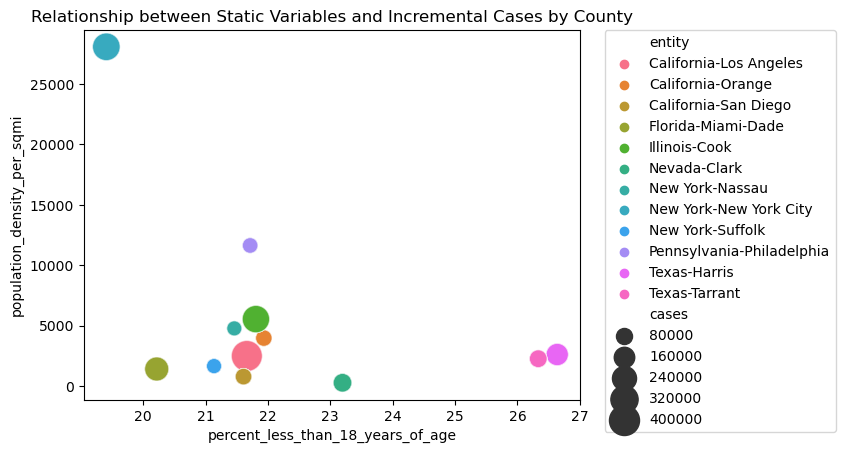

In [141]:
sns.scatterplot(
    data=df,
    x='percent_less_than_18_years_of_age',
    y='population_density_per_sqmi',
    size='cases',
    hue='entity',
    sizes=(50, 500),  # Increase the min and max size of the bubbles
    alpha=0.5
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Relationship between Static Variables and Incremental Cases by County')
plt.xlabel('percent_less_than_18_years_of_age')
plt.ylabel('population_density_per_sqmi')
plt.show()

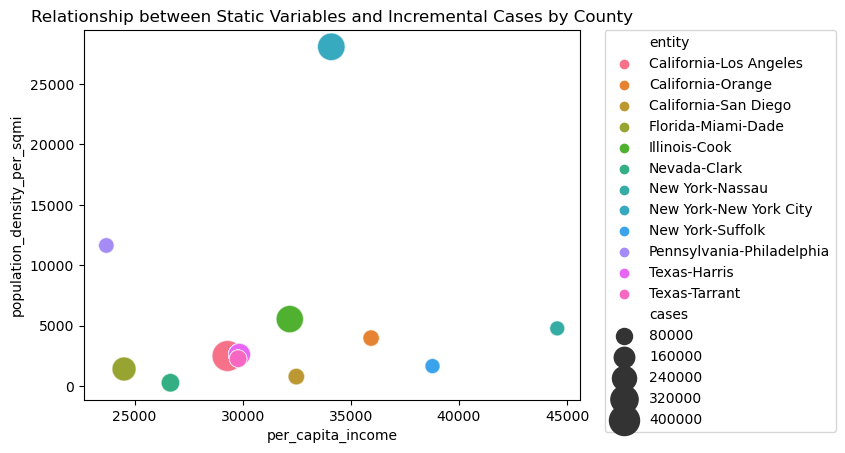

In [144]:
sns.scatterplot(
    data=df,
    x='per_capita_income',
    y='population_density_per_sqmi',
    size='cases',
    hue='entity',
    sizes=(50, 500),  # Increase the min and max size of the bubbles
    alpha=0.5
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Relationship between Static Variables and Incremental Cases by County')
plt.xlabel('per_capita_income')
plt.ylabel('population_density_per_sqmi')
plt.show()

### Box Plot: Rain or not and relationship between incremental cases

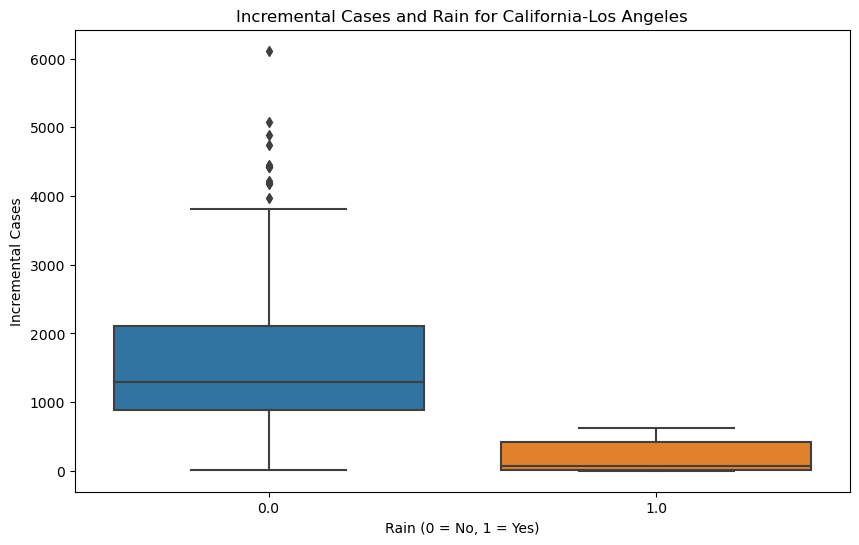

California-Los Angeles - T-statistic: -16.547875975603507, P-value: 2.8045364629257367e-30


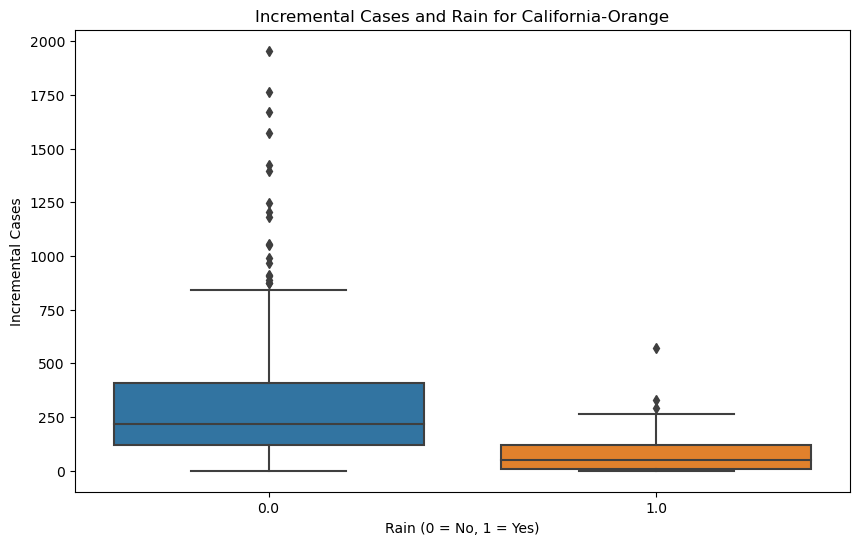

California-Orange - T-statistic: -7.191525450882482, P-value: 2.425147895022728e-10


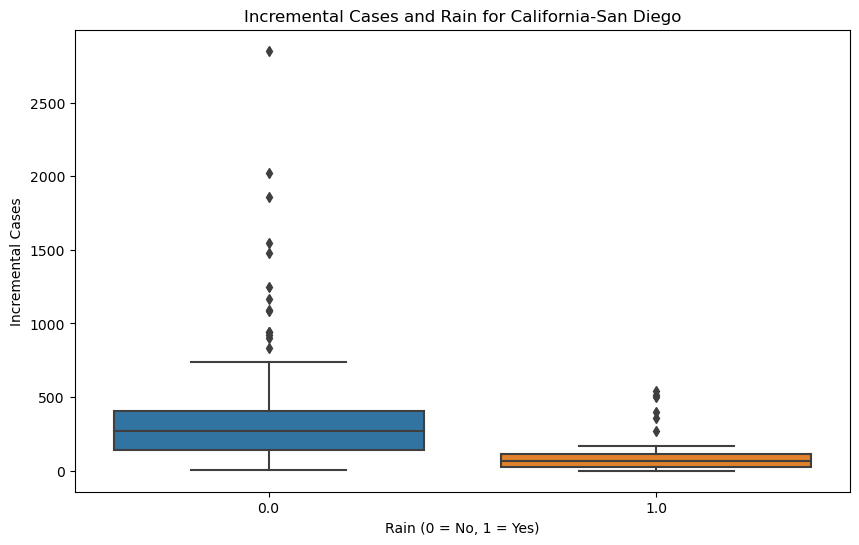

California-San Diego - T-statistic: -5.752258416329389, P-value: 2.2511249397945697e-07


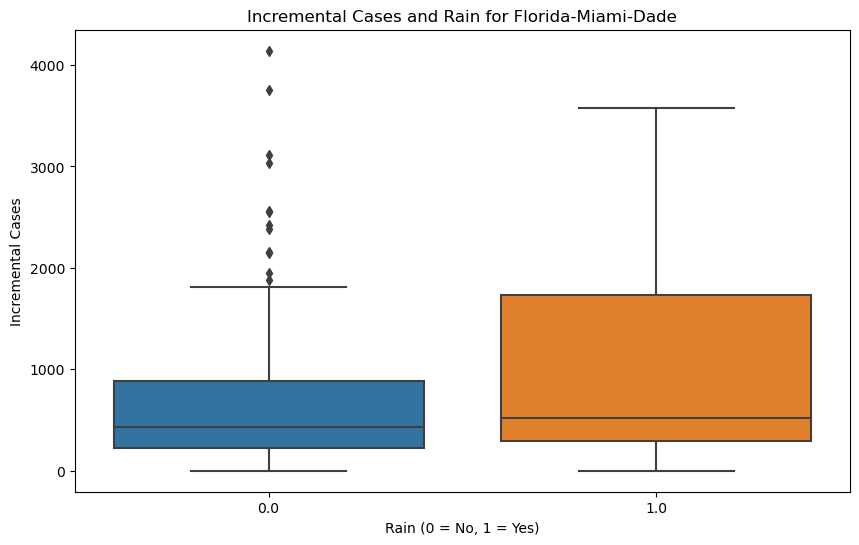

Florida-Miami-Dade - T-statistic: 2.4549077453074837, P-value: 0.014756557977862217


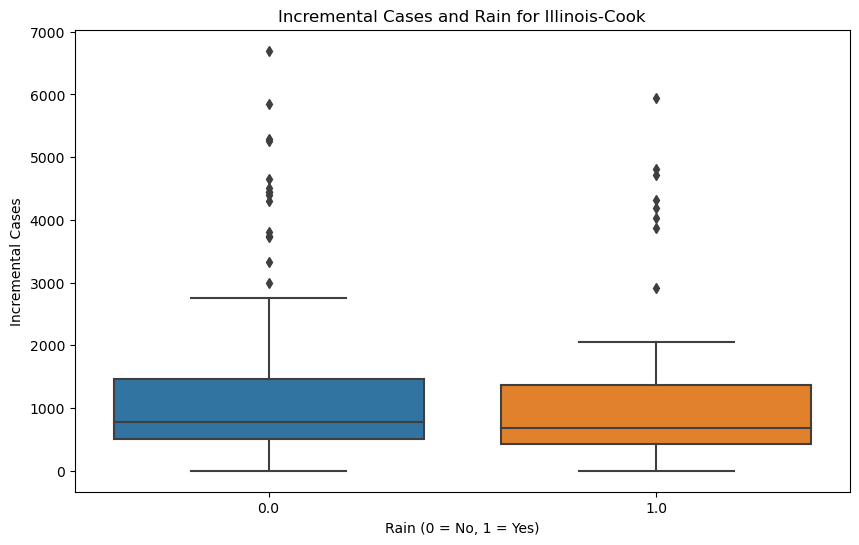

Illinois-Cook - T-statistic: -1.4884697056848732, P-value: 0.13784332600049232


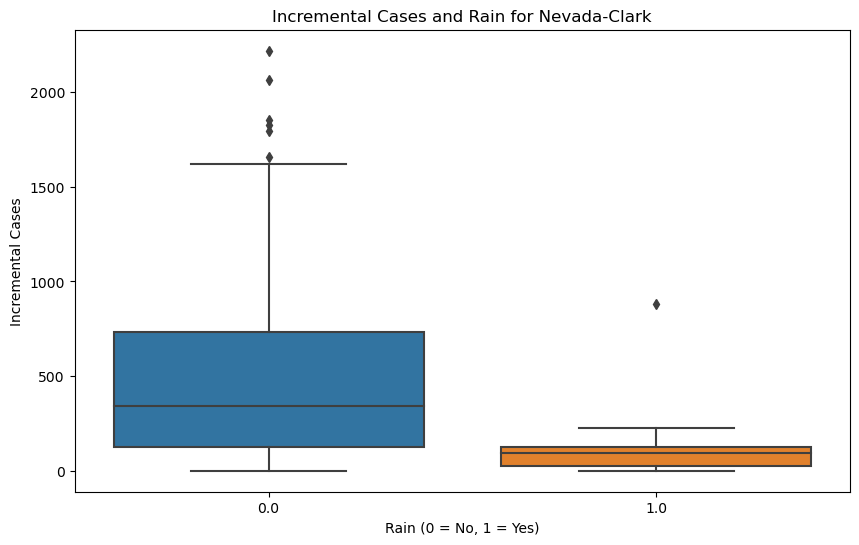

Nevada-Clark - T-statistic: -6.227537463253435, P-value: 1.0738596650152357e-06


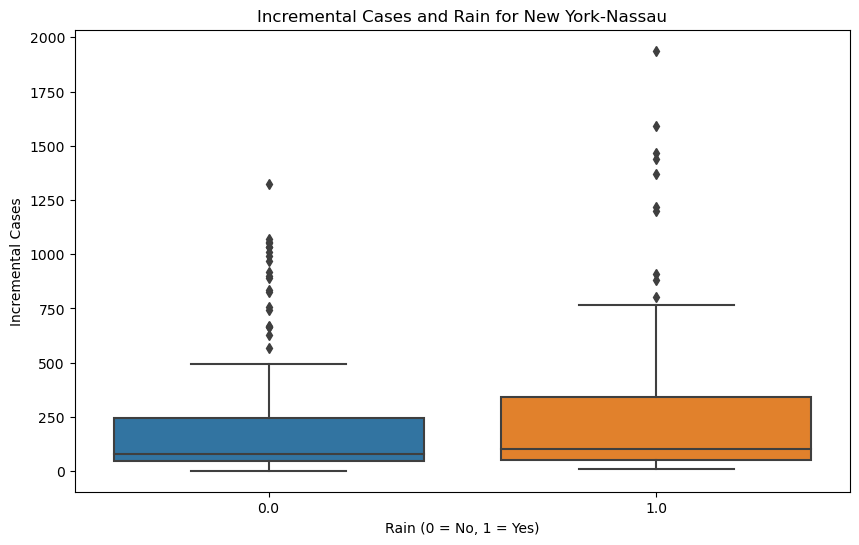

New York-Nassau - T-statistic: 1.369670648352238, P-value: 0.1726551652469338


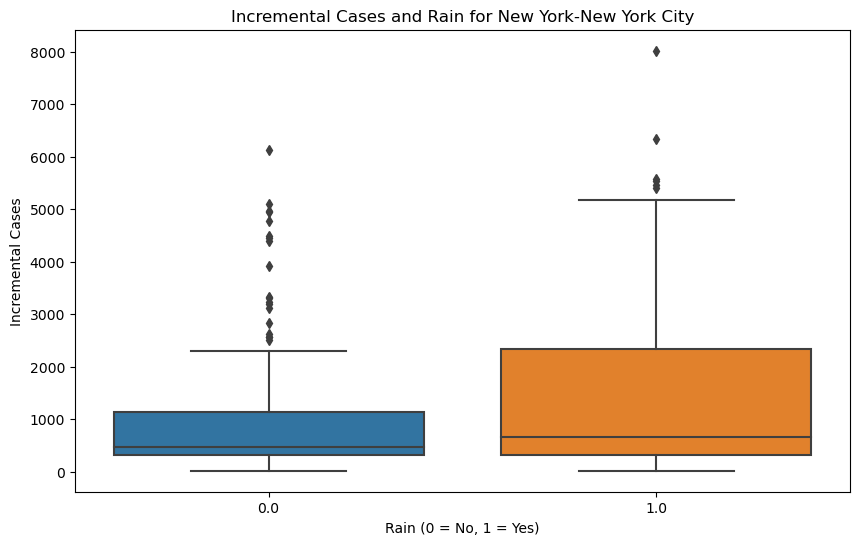

New York-New York City - T-statistic: 2.9437936785704744, P-value: 0.00374594571251921


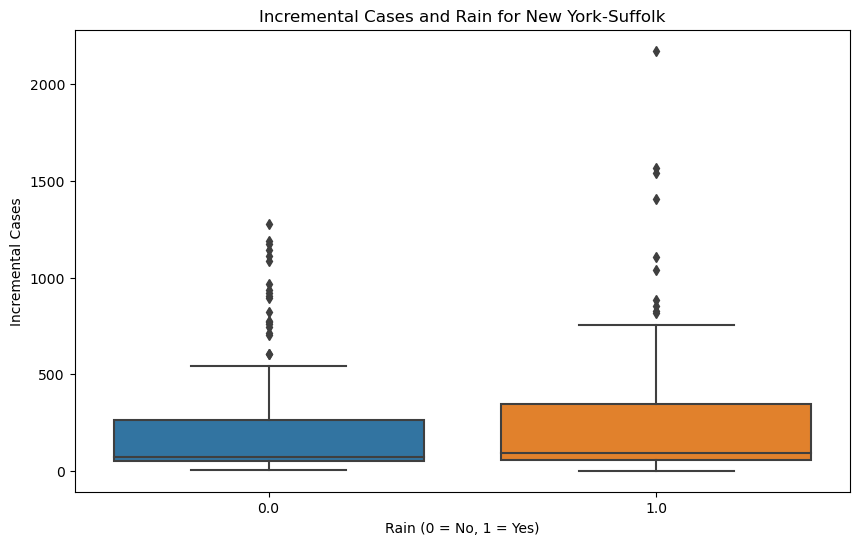

New York-Suffolk - T-statistic: 0.9769899205113844, P-value: 0.3296422417170852


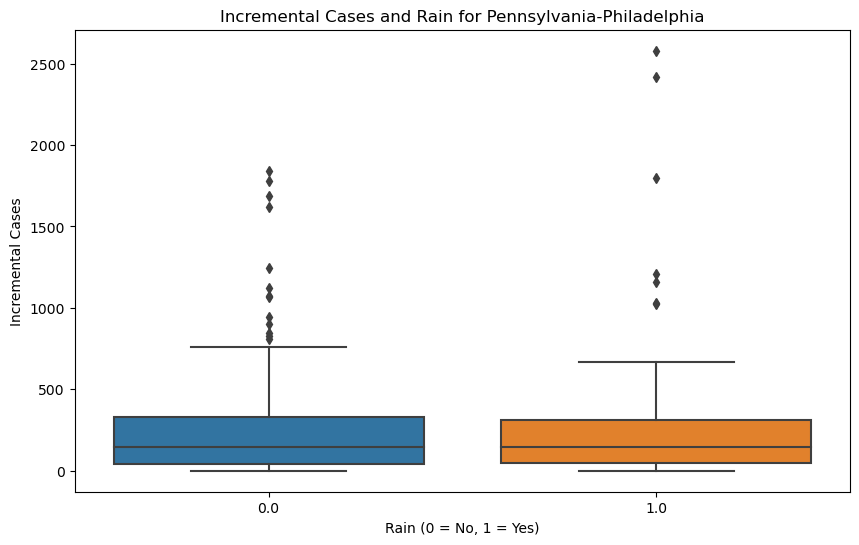

Pennsylvania-Philadelphia - T-statistic: 0.40471139333680944, P-value: 0.686177659440129


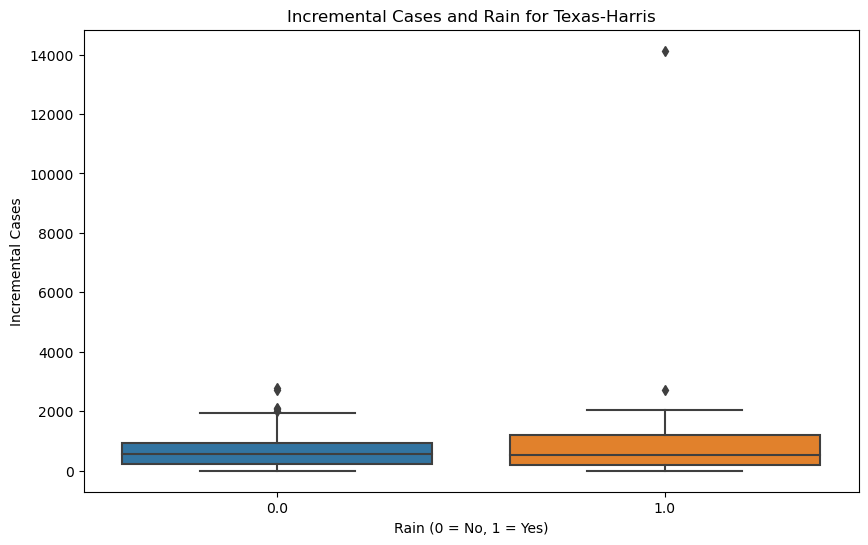

Texas-Harris - T-statistic: 1.138670753267248, P-value: 0.2570980720300428


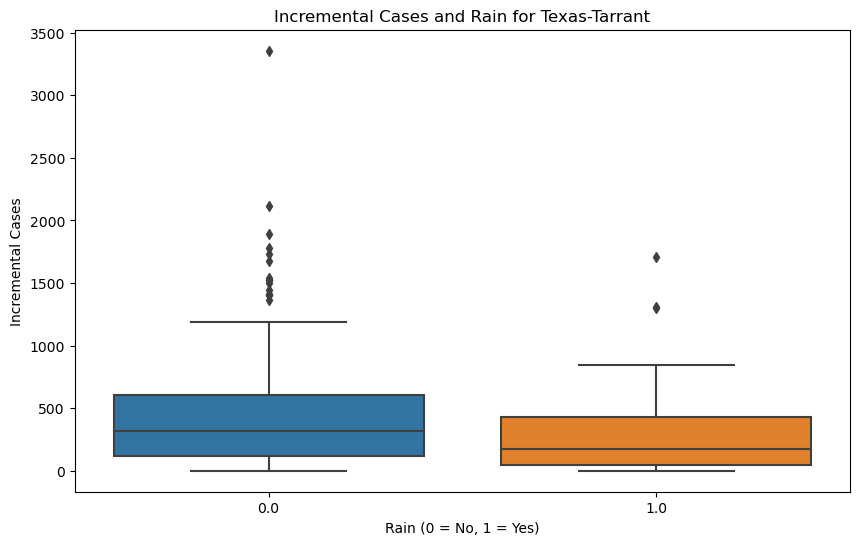

Texas-Tarrant - T-statistic: -3.386372483530052, P-value: 0.0008630960283947093


In [142]:
unique_counties = df['entity'].unique()
for county in unique_counties:
    county_data = df[df['entity'] == county]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='rain', y='incremental_cases', data=county_data)
    plt.title(f'Incremental Cases and Rain for {county}')
    plt.xlabel('Rain (0 = No, 1 = Yes)')
    plt.ylabel('Incremental Cases')
    plt.show()

    # Perform t-test
    rainy_days = county_data[county_data['rain'] == 1]['incremental_cases']
    non_rainy_days = county_data[county_data['rain'] == 0]['incremental_cases']
    t_stat, p_value = stats.ttest_ind(rainy_days, non_rainy_days, nan_policy='omit', equal_var=False)
    
    # Print the results
    print(f"{county} - T-statistic: {t_stat}, P-value: {p_value}")


### Box Plot: Snow or not and relationship between incremental cases

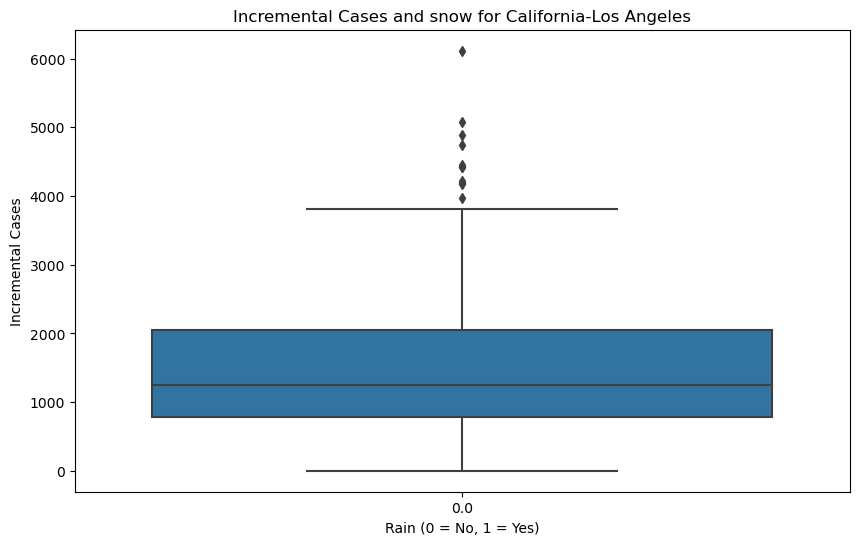

California-Los Angeles - T-statistic: nan, P-value: nan


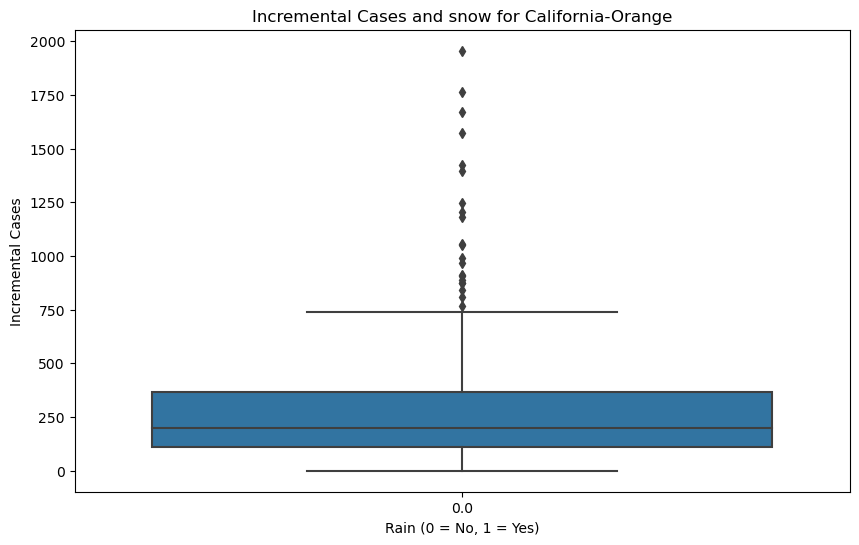

California-Orange - T-statistic: nan, P-value: nan


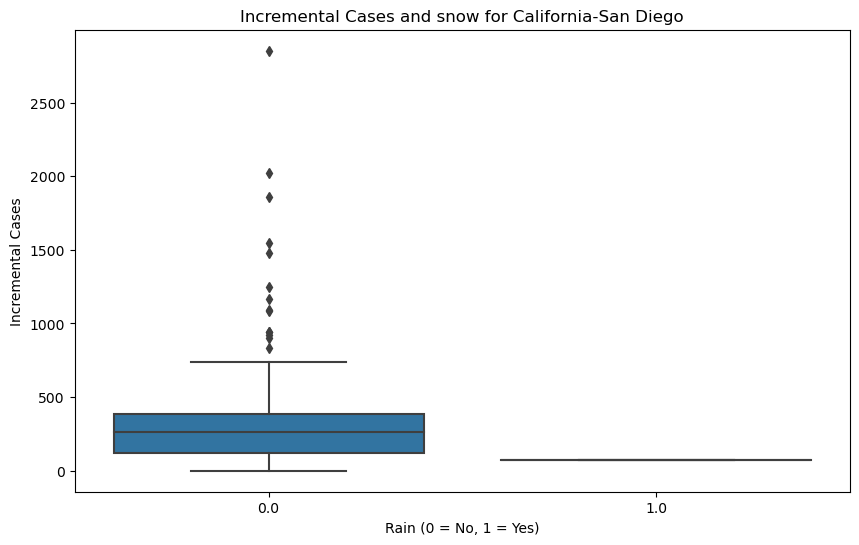

California-San Diego - T-statistic: nan, P-value: nan


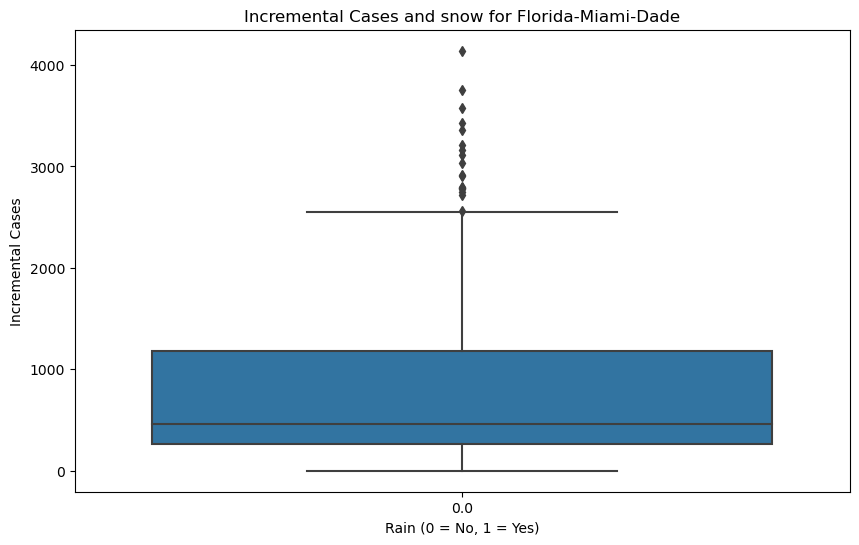

Florida-Miami-Dade - T-statistic: nan, P-value: nan


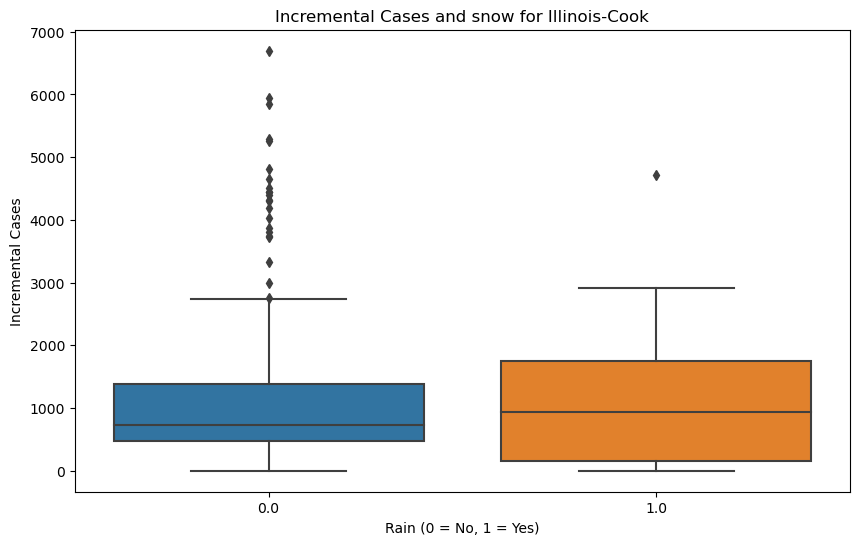

Illinois-Cook - T-statistic: 0.2747482096300435, P-value: 0.7874781249440216


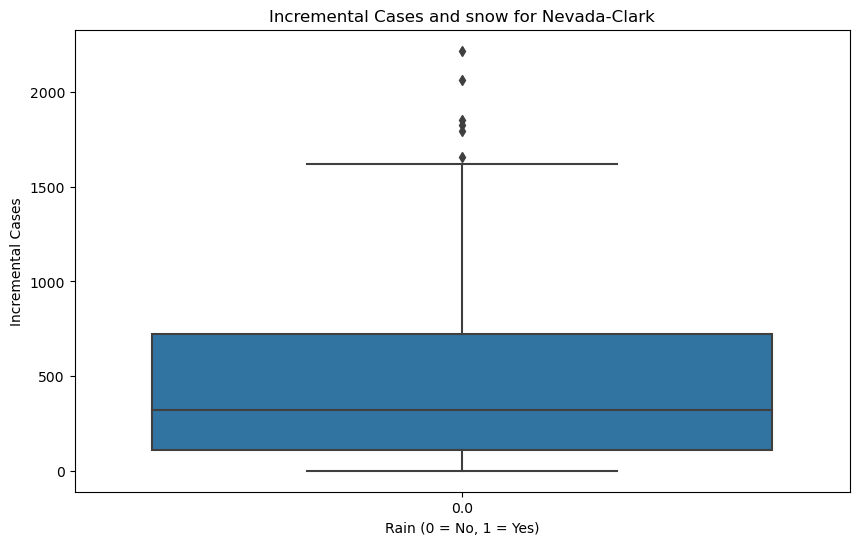

Nevada-Clark - T-statistic: nan, P-value: nan


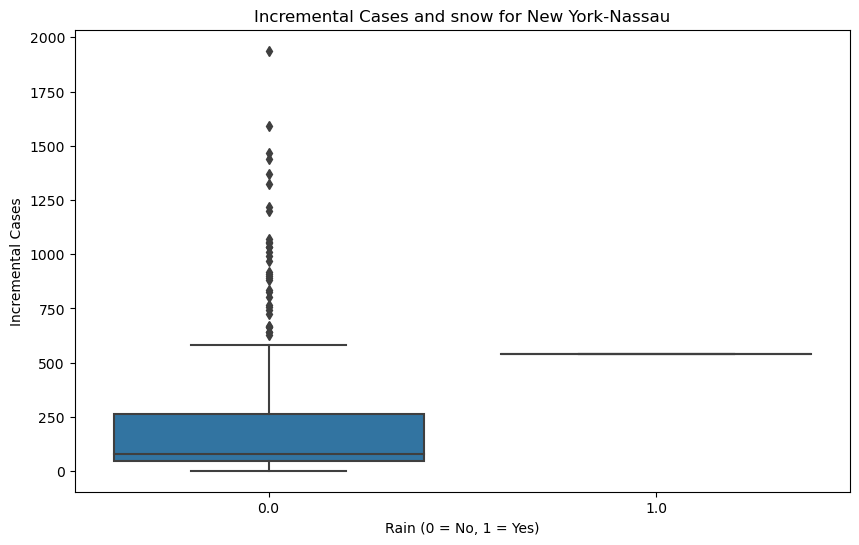

New York-Nassau - T-statistic: nan, P-value: nan


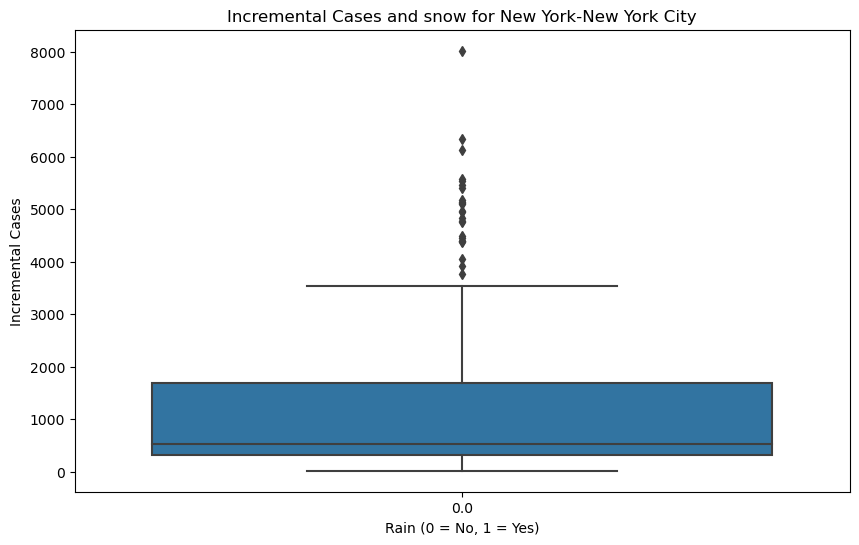

New York-New York City - T-statistic: nan, P-value: nan


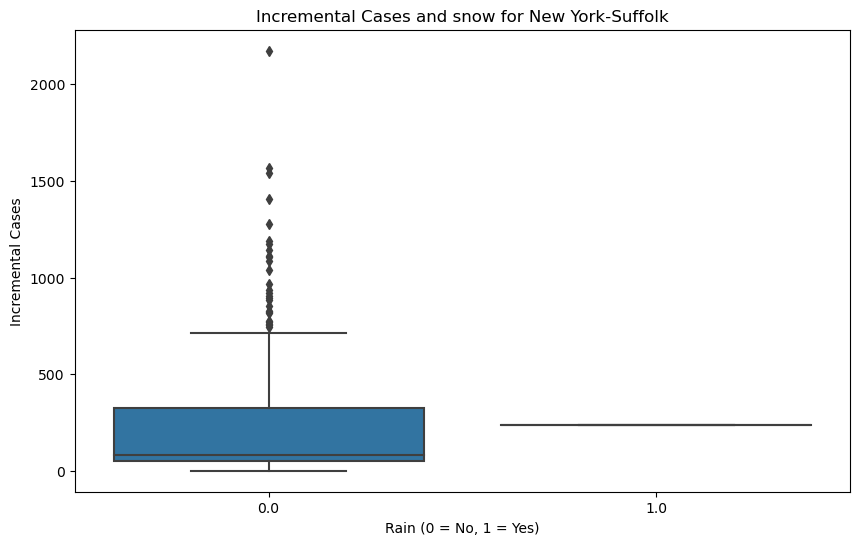

New York-Suffolk - T-statistic: nan, P-value: nan


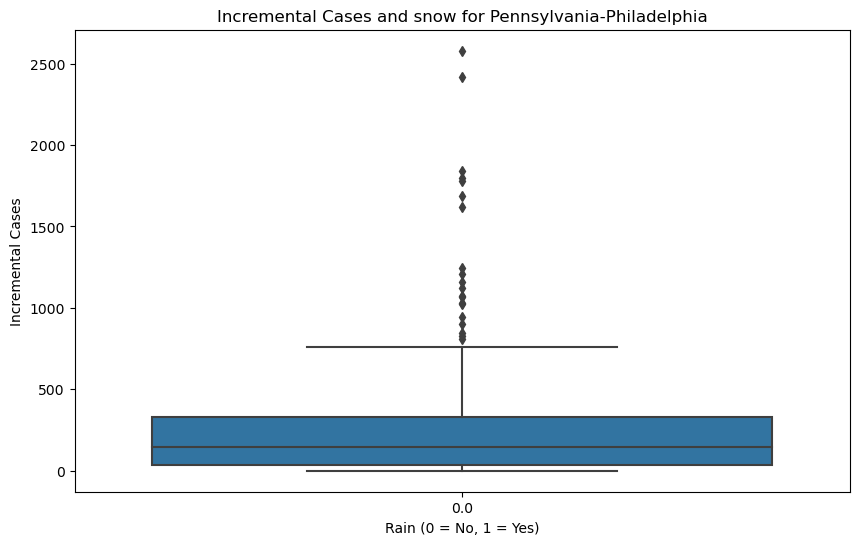

Pennsylvania-Philadelphia - T-statistic: nan, P-value: nan


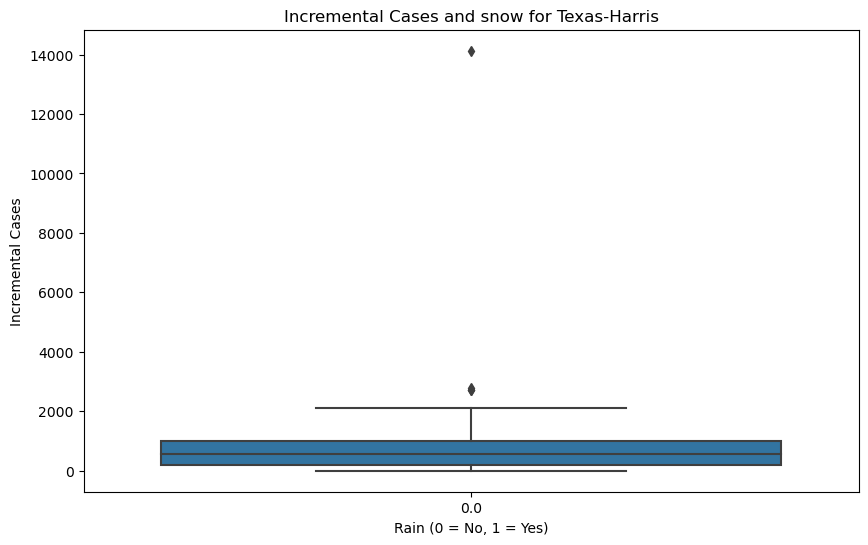

Texas-Harris - T-statistic: nan, P-value: nan


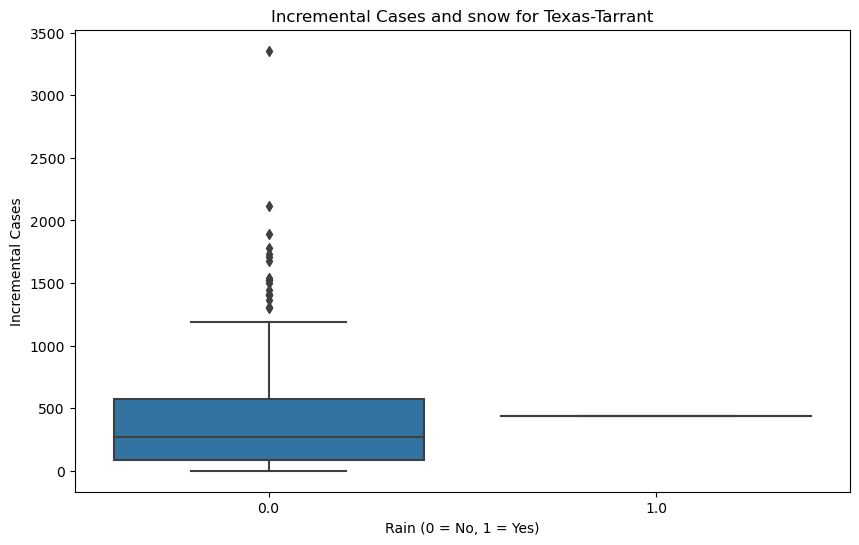

Texas-Tarrant - T-statistic: nan, P-value: nan


In [143]:
# Create a boxplot for each county
unique_counties = df['entity'].unique()
for county in unique_counties:
    county_data = df[df['entity'] == county]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='snow', y='incremental_cases', data=county_data)
    plt.title(f'Incremental Cases and snow for {county}')
    plt.xlabel('Rain (0 = No, 1 = Yes)')
    plt.ylabel('Incremental Cases')
    plt.show()

    # Perform t-test
    rainy_days = county_data[county_data['snow'] == 1]['incremental_cases']
    non_rainy_days = county_data[county_data['snow'] == 0]['incremental_cases']
    t_stat, p_value = stats.ttest_ind(rainy_days, non_rainy_days, nan_policy='omit', equal_var=False)
    
    # Print the results
    print(f"{county} - T-statistic: {t_stat}, P-value: {p_value}")

In [ ]:
##Adding more visualizations? 